## **Focus Points:**
  ### **- Data Pre-processing with Pyspark**
  ### **- Exploratory Data Analysis**
  ### **- Classification**
  ### **- Price Prediction**

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Installing Pyspark, Libraries and Data Upload**

In [1]:
pip install pyspark

In [2]:
pip install py4j

In [3]:
pip install findspark

In [4]:
import findspark
findspark.init()

In [5]:
### Importing Neccessary Libraries
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql import functions as f
from pyspark.sql import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
### Create a Spark Session and assign to a varable
spark = SparkSession\
            .builder\
            .config("spark.driver.memory", "200g")\
            .appName("sales data")\
            .getOrCreate()

### Check Spark varable
spark

In [7]:
### Import dimension and fact files
from google.colab import files
uploaded = files.upload()

Saving DimAccount.csv to DimAccount.csv
Saving DimCurrency.csv to DimCurrency.csv
Saving DimCustomer.csv to DimCustomer.csv
Saving DimDate.csv to DimDate.csv
Saving DimDate.xlsx to DimDate.xlsx
Saving DimDepartmentGroup.csv to DimDepartmentGroup.csv
Saving DimGeography.csv to DimGeography.csv
Saving DimOrganization.csv to DimOrganization.csv
Saving DimProduct.csv to DimProduct.csv
Saving DimProductCategory.csv to DimProductCategory.csv
Saving DimProductSubcategory.csv to DimProductSubcategory.csv
Saving DimPromotion.csv to DimPromotion.csv
Saving DimReseller.csv to DimReseller.csv
Saving DimSalesReason.csv to DimSalesReason.csv
Saving DimSalesTerritory.csv to DimSalesTerritory.csv
Saving DimScenario.csv to DimScenario.csv
Saving FactCallCenter.csv to FactCallCenter.csv
Saving FactCurrencyRate.csv to FactCurrencyRate.csv
Saving FactFinance.csv to FactFinance.csv
Saving FactInternetSales.csv to FactInternetSales.csv
Saving FactSalesTargets.csv to FactSalesTargets.csv


## **DATA PREPROCESSING**

### **Read Currency Dimension File**

In [8]:
### read and show the dataset
py_currency = spark.read.csv('/content/DimCurrency.csv', header=True, inferSchema=True)
py_currency.show(10)

### Check Schema
py_currency.printSchema()

## Check Type
type(py_currency)

### Get count of records
py_currency.count()

+-----------+--------------------+-------------------+
|CurrencyKey|CurrencyAlternateKey|       CurrencyName|
+-----------+--------------------+-------------------+
|          1|                 AFA|            Afghani|
|          2|                 DZD|     Algerian Dinar|
|          3|                 ARS|     Argentine Peso|
|          4|                 AMD|      Armenian Dram|
|          5|                 AWG|     Aruban Guilder|
|          6|                 AUD|  Australian Dollar|
|          7|                 AZM|Azerbaijanian Manat|
|          8|                 BSD|    Bahamian Dollar|
|          9|                 BHD|     Bahraini Dinar|
|         10|                 THB|               Baht|
+-----------+--------------------+-------------------+
only showing top 10 rows

root
 |-- CurrencyKey: integer (nullable = true)
 |-- CurrencyAlternateKey: string (nullable = true)
 |-- CurrencyName: string (nullable = true)



105

In [9]:
### Dropping variables not needed
py_currency = py_currency.drop('CurrencyAlternateKey')
py_currency.show(10)

### Get count of records
py_currency.count()

+-----------+-------------------+
|CurrencyKey|       CurrencyName|
+-----------+-------------------+
|          1|            Afghani|
|          2|     Algerian Dinar|
|          3|     Argentine Peso|
|          4|      Armenian Dram|
|          5|     Aruban Guilder|
|          6|  Australian Dollar|
|          7|Azerbaijanian Manat|
|          8|    Bahamian Dollar|
|          9|     Bahraini Dinar|
|         10|               Baht|
+-----------+-------------------+
only showing top 10 rows



105

In [10]:
### Renaming Column
py_currency = py_currency.withColumnRenamed('CurrencyName', 'Currency')
py_currency.show(10)

### Get count of records
py_currency.count()

+-----------+-------------------+
|CurrencyKey|           Currency|
+-----------+-------------------+
|          1|            Afghani|
|          2|     Algerian Dinar|
|          3|     Argentine Peso|
|          4|      Armenian Dram|
|          5|     Aruban Guilder|
|          6|  Australian Dollar|
|          7|Azerbaijanian Manat|
|          8|    Bahamian Dollar|
|          9|     Bahraini Dinar|
|         10|               Baht|
+-----------+-------------------+
only showing top 10 rows



105

In [11]:
### Get distinct value of column
py_currency.select("Currency").distinct().show()

### Get count of records in column
py_currency.select(f.countDistinct(py_currency.CurrencyKey)).show()

### Get count of records
py_currency.count()

+-------------------+
|           Currency|
+-------------------+
|             Forint|
|    Jamaican Dollar|
|              Tolar|
|     Uruguayan Peso|
|           Shilling|
|     Brazilian Real|
|    Jordanian Dinar|
|      Swedish Krona|
|       Maltese Lira|
|             Markka|
|                Yen|
|  New Taiwan Dollar|
|             Kwanza|
|     Namibia Dollar|
|Azerbaijanian Manat|
|   Hong Kong Dollar|
|     Pakistan Rupee|
|            Afghani|
|     Colombian Peso|
|       Indian Rupee|
+-------------------+
only showing top 20 rows

+---------------------------+
|count(DISTINCT CurrencyKey)|
+---------------------------+
|                        105|
+---------------------------+



105

There are 105 distinct currencies in the file. In other for us to visualise anything that has to do with revenuew, there will be a need to convert these currencies to a one accepted globally.

### **Read Date Dimension File**

In [12]:
### read and show the dataset
py_date = spark.read.csv('/content/DimDate.csv', header=True, inferSchema=True)
py_date.show(10)

### Check Schema
py_date.printSchema()

## Check Type
type(py_date)

### Get count of records
py_date.count()

+--------+--------------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+----------------+---------------+-----------------+---------------+------------+----------------+-------------+----------+--------------+----------+
| DateKey|FullDateAlternateKey|DayNumberOfWeek|EnglishDayNameOfWeek|SpanishDayNameOfWeek|FrenchDayNameOfWeek|DayNumberOfMonth|DayNumberOfYear|WeekNumberOfYear|EnglishMonthName|SpanishMonthName|FrenchMonthName|MonthNumberOfYear|CalendarQuarter|CalendarYear|CalendarSemester|FiscalQuarter|FiscalYear|FiscalSemester|  Max Year|
+--------+--------------------+---------------+--------------------+--------------------+-------------------+----------------+---------------+----------------+----------------+----------------+---------------+-----------------+---------------+------------+----------------+-------------+----------+--------------+----------+
|20050101|          01/01

2191

In [13]:
### Selecting variables needed
py_date = py_date.select(['DateKey','EnglishDayNameOfWeek','DayNumberOfMonth','EnglishMonthName','CalendarQuarter','CalendarYear'])
py_date.show(10)

### Get count of records
py_date.count()

+--------+--------------------+----------------+----------------+---------------+------------+
| DateKey|EnglishDayNameOfWeek|DayNumberOfMonth|EnglishMonthName|CalendarQuarter|CalendarYear|
+--------+--------------------+----------------+----------------+---------------+------------+
|20050101|            Saturday|               1|         January|              1|        2005|
|20050102|              Sunday|               2|         January|              1|        2005|
|20050103|              Monday|               3|         January|              1|        2005|
|20050104|             Tuesday|               4|         January|              1|        2005|
|20050105|           Wednesday|               5|         January|              1|        2005|
|20050106|            Thursday|               6|         January|              1|        2005|
|20050107|              Friday|               7|         January|              1|        2005|
|20050108|            Saturday|               8|  

2191

In [14]:
### Renaming Column
py_date = py_date.withColumnRenamed('EnglishDayNameOfWeek', 'DayOfWeek')
py_date = py_date.withColumnRenamed('DayNumberOfMonth', 'DayOfMonth')
py_date = py_date.withColumnRenamed('EnglishMonthName', 'CalendarMonth')
py_date.show(10)

### Get count of records
py_date.count()

+--------+---------+----------+-------------+---------------+------------+
| DateKey|DayOfWeek|DayOfMonth|CalendarMonth|CalendarQuarter|CalendarYear|
+--------+---------+----------+-------------+---------------+------------+
|20050101| Saturday|         1|      January|              1|        2005|
|20050102|   Sunday|         2|      January|              1|        2005|
|20050103|   Monday|         3|      January|              1|        2005|
|20050104|  Tuesday|         4|      January|              1|        2005|
|20050105|Wednesday|         5|      January|              1|        2005|
|20050106| Thursday|         6|      January|              1|        2005|
|20050107|   Friday|         7|      January|              1|        2005|
|20050108| Saturday|         8|      January|              1|        2005|
|20050109|   Sunday|         9|      January|              1|        2005|
|20050110|   Monday|        10|      January|              1|        2005|
+--------+---------+-----

2191

In [15]:
### Get distinct value of column
py_date.select("CalendarYear").distinct().show()

### Get count of records
py_date.count()

+------------+
|CalendarYear|
+------------+
|        2007|
|        2006|
|        2009|
|        2005|
|        2010|
|        2008|
+------------+



2191

The years captured in the dataset is between 2005 - 2010

### **Read Sales Territory Dimension File**

In [16]:
### read and show the dataset
py_salesterritory = spark.read.csv('/content/DimSalesTerritory.csv', header=True, inferSchema=True)
py_salesterritory.show(10)

### Check Schema
py_salesterritory.printSchema()

## Check Type
type(py_salesterritory)

### Get count of records
py_salesterritory.count()

+-----------------+--------------------------+--------------------+---------------------+-------------------+
|SalesTerritoryKey|SalesTerritoryAlternateKey|SalesTerritoryRegion|SalesTerritoryCountry|SalesTerritoryGroup|
+-----------------+--------------------------+--------------------+---------------------+-------------------+
|                1|                         1|           Northwest|        United States|      North America|
|                2|                         2|           Northeast|        United States|      North America|
|                3|                         3|             Central|        United States|      North America|
|                4|                         4|           Southwest|        United States|      North America|
|                5|                         5|           Southeast|        United States|      North America|
|                6|                         6|              Canada|               Canada|      North America|
|         

11

In [17]:
### Dropping variables not needed
py_salesterritory = py_salesterritory.drop('SalesTerritoryAlternateKey','SalesTerritoryGroup')
py_salesterritory.show(10)

### Get count of records
py_salesterritory.count()

+-----------------+--------------------+---------------------+
|SalesTerritoryKey|SalesTerritoryRegion|SalesTerritoryCountry|
+-----------------+--------------------+---------------------+
|                1|           Northwest|        United States|
|                2|           Northeast|        United States|
|                3|             Central|        United States|
|                4|           Southwest|        United States|
|                5|           Southeast|        United States|
|                6|              Canada|               Canada|
|                7|              France|               France|
|                8|             Germany|              Germany|
|                9|           Australia|            Australia|
|               10|      United Kingdom|       United Kingdom|
+-----------------+--------------------+---------------------+
only showing top 10 rows



11

In [18]:
### Renaming Columns
py_salesterritory = py_salesterritory.withColumnRenamed('SalesTerritoryRegion', 'Region')
py_salesterritory = py_salesterritory.withColumnRenamed('SalesTerritoryCountry', 'Country')
py_salesterritory.show(11)

### Get count of records
py_salesterritory.count()

+-----------------+--------------+--------------+
|SalesTerritoryKey|        Region|       Country|
+-----------------+--------------+--------------+
|                1|     Northwest| United States|
|                2|     Northeast| United States|
|                3|       Central| United States|
|                4|     Southwest| United States|
|                5|     Southeast| United States|
|                6|        Canada|        Canada|
|                7|        France|        France|
|                8|       Germany|       Germany|
|                9|     Australia|     Australia|
|               10|United Kingdom|United Kingdom|
|               11|            NA|            NA|
+-----------------+--------------+--------------+



11

In [19]:
### Get distinct value of column
py_salesterritory.select("Country").distinct().show()

### Get count of records
py_salesterritory.count()

+--------------+
|       Country|
+--------------+
|       Germany|
|        France|
|            NA|
| United States|
|        Canada|
|     Australia|
|United Kingdom|
+--------------+



11

The dataset has null values in addition to 6 countries

### **Read Geography Dimension File**

In [20]:
### read and show the dataset
py_geography = spark.read.csv('/content/DimGeography.csv', header=True, inferSchema=True)
py_geography.show(10)

### Check Schema
py_geography.printSchema()

## Check Type
type(py_geography)

### Get count of records
py_geography.count()

+------------+-------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|         City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+-------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|   Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2|Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                9|   

655

In [21]:
### Selecting variables needed
py_geography = py_geography.select(['GeographyKey','SalesTerritoryKey',])
py_geography.show(10)

### Get count of records
py_geography.count()

+------------+-----------------+
|GeographyKey|SalesTerritoryKey|
+------------+-----------------+
|           1|                9|
|           2|                9|
|           3|                9|
|           4|                9|
|           5|                9|
|           6|                9|
|           7|                9|
|           8|                9|
|           9|                9|
|          10|                9|
+------------+-----------------+
only showing top 10 rows



655

In [22]:
### Get distinct value of column
py_geography.select("GeographyKey").distinct().show()

### Get count of records in column
py_geography.select(f.countDistinct(py_geography.GeographyKey)).show()

+------------+
|GeographyKey|
+------------+
|         148|
|         463|
|         471|
|         496|
|         243|
|         392|
|         540|
|         623|
|          31|
|         516|
|          85|
|         137|
|         251|
|         451|
|         580|
|          65|
|         458|
|          53|
|         255|
|         481|
+------------+
only showing top 20 rows

+----------------------------+
|count(DISTINCT GeographyKey)|
+----------------------------+
|                         655|
+----------------------------+



### **Read Product Sub Category Dimension File**

In [23]:
### read and show the dataset
py_product_subcat = spark.read.csv('/content/DimProductSubcategory.csv', header=True, inferSchema=True)
py_product_subcat.show(10)

### Check Schema
py_product_subcat.printSchema()

## Check Type
type(py_product_subcat)

### Get count of records
py_product_subcat.count()

+---------------------+------------------------------+-----------------------------+------------------+
|ProductSubcategoryKey|ProductSubcategoryAlternateKey|EnglishProductSubcategoryName|ProductCategoryKey|
+---------------------+------------------------------+-----------------------------+------------------+
|                    1|                             1|               Mountain Bikes|                 1|
|                    2|                             2|                   Road Bikes|                 1|
|                    3|                             3|                Touring Bikes|                 1|
|                    4|                             4|                   Handlebars|                 2|
|                    5|                             5|              Bottom Brackets|                 2|
|                    6|                             6|                       Brakes|                 2|
|                    7|                             7|          

37

In [24]:
### Dropping variables not needed
py_product_subcat = py_product_subcat.drop('ProductSubcategoryAlternateKey')
py_product_subcat.show(10)

### Get count of records
py_product_subcat.count()

+---------------------+-----------------------------+------------------+
|ProductSubcategoryKey|EnglishProductSubcategoryName|ProductCategoryKey|
+---------------------+-----------------------------+------------------+
|                    1|               Mountain Bikes|                 1|
|                    2|                   Road Bikes|                 1|
|                    3|                Touring Bikes|                 1|
|                    4|                   Handlebars|                 2|
|                    5|              Bottom Brackets|                 2|
|                    6|                       Brakes|                 2|
|                    7|                       Chains|                 2|
|                    8|                    Cranksets|                 2|
|                    9|                  Derailleurs|                 2|
|                   10|                        Forks|                 2|
+---------------------+----------------------------

37

In [25]:
### Renaming Column
py_product_subcat = py_product_subcat.withColumnRenamed('EnglishProductSubcategoryName', 'ProductSubcategory')
py_product_subcat.show(10)

### Get count of records
py_product_subcat.count()

+---------------------+------------------+------------------+
|ProductSubcategoryKey|ProductSubcategory|ProductCategoryKey|
+---------------------+------------------+------------------+
|                    1|    Mountain Bikes|                 1|
|                    2|        Road Bikes|                 1|
|                    3|     Touring Bikes|                 1|
|                    4|        Handlebars|                 2|
|                    5|   Bottom Brackets|                 2|
|                    6|            Brakes|                 2|
|                    7|            Chains|                 2|
|                    8|         Cranksets|                 2|
|                    9|       Derailleurs|                 2|
|                   10|             Forks|                 2|
+---------------------+------------------+------------------+
only showing top 10 rows



37

In [26]:
### Get distinct value of column
py_product_subcat.select("ProductSubcategory").distinct().show()

### Get count of records in column
py_product_subcat.select(f.countDistinct(py_product_subcat.ProductSubcategory)).show()

### Get count of records
py_product_subcat.count()

+------------------+
|ProductSubcategory|
+------------------+
|          Headsets|
|            Wheels|
|   Bottom Brackets|
|    Touring Frames|
|    Mountain Bikes|
|            Pedals|
|       Derailleurs|
|            Chains|
|             Pumps|
|   Hydration Packs|
|        Road Bikes|
| Bottles and Cages|
|       Road Frames|
|             Forks|
|             Vests|
|            Brakes|
|           Helmets|
|           Saddles|
|            Tights|
|           Jerseys|
+------------------+
only showing top 20 rows

+----------------------------------+
|count(DISTINCT ProductSubcategory)|
+----------------------------------+
|                                37|
+----------------------------------+



37

There are 37 distinct Product subcategories.

### **Read Product Category Dimension File**

In [27]:
### read and show the dataset
py_product_cat = spark.read.csv('/content/DimProductCategory.csv', header=True, inferSchema=True)
py_product_cat.show(10)

### Check Schema
py_product_cat.printSchema()

## Check Type
type(py_product_cat)

### Get count of records
py_product_cat.count()

+------------------+---------------------------+--------------------------+--------------------------+-------------------------+
|ProductCategoryKey|ProductCategoryAlternateKey|EnglishProductCategoryName|SpanishProductCategoryName|FrenchProductCategoryName|
+------------------+---------------------------+--------------------------+--------------------------+-------------------------+
|                 1|                          1|                     Bikes|                 Bicicleta|                     V�lo|
|                 2|                          2|                Components|                Componente|                Composant|
|                 3|                          3|                  Clothing|                    Prenda|                V�tements|
|                 4|                          4|               Accessories|                 Accesorio|               Accessoire|
+------------------+---------------------------+--------------------------+----------------------

4

In [28]:
### Dropping variables not needed
py_product_cat = py_product_cat.drop('ProductCategoryAlternateKey','SpanishProductCategoryName','FrenchProductCategoryName')
py_product_cat.show(10)

### Get count of records
py_product_cat.count()

+------------------+--------------------------+
|ProductCategoryKey|EnglishProductCategoryName|
+------------------+--------------------------+
|                 1|                     Bikes|
|                 2|                Components|
|                 3|                  Clothing|
|                 4|               Accessories|
+------------------+--------------------------+



4

In [29]:
### Renaming Column
py_product_cat = py_product_cat.withColumnRenamed('EnglishProductCategoryName', 'ProductCategory')
py_product_cat.show(10)

### Get count of records
py_product_cat.count()

+------------------+---------------+
|ProductCategoryKey|ProductCategory|
+------------------+---------------+
|                 1|          Bikes|
|                 2|     Components|
|                 3|       Clothing|
|                 4|    Accessories|
+------------------+---------------+



4

There are 4 product categories

### **Read Product Dimension File**

In [30]:
### read and show the dataset
py_product = spark.read.csv('/content/DimProduct.csv', header=True, inferSchema=True)
py_product.show(10)

### Check Schema
py_product.printSchema()

## Check Type
type(py_product)

### Get count of records
py_product.count()

+----------+-------------------+---------------------+---------------------+-------------------+--------------------+------------------+-----------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+---------+------------------+----------------+-------+-------+
|ProductKey|ProductAlternateKey|ProductSubcategoryKey|WeightUnitMeasureCode|SizeUnitMeasureCode|  EnglishProductName|SpanishProductName|FrenchProductName|StandardCost|FinishedGoodsFlag| Color|SafetyStockLevel|ReorderPoint|ListPrice|Size|SizeRange|Weight|DaysToManufacture|ProductLine|DealerPrice|Class|Style|ModelName|EnglishDescription|       StartDate|EndDate| Status|
+----------+-------------------+---------------------+---------------------+-------------------+--------------------+------------------+-----------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+----

606

In [31]:
### Selecting variables needed
py_product = py_product.select(['ProductKey','ProductSubcategoryKey','EnglishProductName'])
py_product.show(10)

### Get count of records
py_product.count()

+----------+---------------------+--------------------+
|ProductKey|ProductSubcategoryKey|  EnglishProductName|
+----------+---------------------+--------------------+
|         1|                    0|     Adjustable Race|
|         2|                    0|        Bearing Ball|
|         3|                    0|     BB Ball Bearing|
|         4|                    0|Headset Ball Bear...|
|         5|                    0|               Blade|
|         6|                    0|         LL Crankarm|
|         7|                    0|         ML Crankarm|
|         8|                    0|         HL Crankarm|
|         9|                    0|     Chainring Bolts|
|        10|                    0|       Chainring Nut|
+----------+---------------------+--------------------+
only showing top 10 rows



606

In [32]:
### Renaming Column
py_product = py_product.withColumnRenamed('EnglishProductName', 'ProductName')
py_product.show(10)

### Get count of records
py_product.count()

+----------+---------------------+--------------------+
|ProductKey|ProductSubcategoryKey|         ProductName|
+----------+---------------------+--------------------+
|         1|                    0|     Adjustable Race|
|         2|                    0|        Bearing Ball|
|         3|                    0|     BB Ball Bearing|
|         4|                    0|Headset Ball Bear...|
|         5|                    0|               Blade|
|         6|                    0|         LL Crankarm|
|         7|                    0|         ML Crankarm|
|         8|                    0|         HL Crankarm|
|         9|                    0|     Chainring Bolts|
|        10|                    0|       Chainring Nut|
+----------+---------------------+--------------------+
only showing top 10 rows



606

In [33]:
### Get distinct value of column
py_product.select("ProductName").distinct().show()

### Get count of records in column
py_product.select(f.countDistinct(py_product.ProductName)).show()

### Get count of records
py_product.count()

+--------------------+
|         ProductName|
+--------------------+
|HL Road Frame - R...|
|             Decal 1|
|ML Road Frame - R...|
|Mountain-200 Blac...|
|Headlights - Weat...|
|      Lock Washer 10|
|           Down Tube|
|             ML Fork|
|   Women's Tights, S|
|Touring-1000 Yell...|
|Touring-1000 Blue...|
|ML Touring Seat A...|
|  ML Road Rear Wheel|
|HL Road Frame - B...|
|Short-Sleeve Clas...|
|ML Mountain Frame...|
|       Flat Washer 4|
|  LL Road Handlebars|
|External Lock Was...|
|    Road-450 Red, 44|
+--------------------+
only showing top 20 rows

+---------------------------+
|count(DISTINCT ProductName)|
+---------------------------+
|                        504|
+---------------------------+



606

There are 504 distinct products in the dataset

### **Read Customer Dimension File**

In [34]:
### read and show the dataset
py_customer = spark.read.csv('/content/DimCustomer.csv', header=True, inferSchema=True)
py_customer.show(10)

### Check Schema
py_customer.printSchema()

## Check Type
type(py_customer)

### Get count of records
py_customer.count()

+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|AddressLine2|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+-

18484

In [35]:
### Selecting variables needed
py_customer = py_customer.select(['CustomerKey','BirthDate','Gender','EnglishEducation','EnglishOccupation','YearlyIncome'])
py_customer.show(10)

### Get count of records
py_customer.count()

+-----------+----------+------+----------------+-----------------+------------+
|CustomerKey| BirthDate|Gender|EnglishEducation|EnglishOccupation|YearlyIncome|
+-----------+----------+------+----------------+-----------------+------------+
|      11000|1966-04-08|     M|       Bachelors|     Professional|       90000|
|      11001|1965-05-14|     M|       Bachelors|     Professional|       60000|
|      11002|1965-08-12|     M|       Bachelors|     Professional|       60000|
|      11003|1968-02-15|     F|       Bachelors|     Professional|       70000|
|      11004|1968-08-08|     F|       Bachelors|     Professional|       80000|
|      11005|1965-08-05|     M|       Bachelors|     Professional|       70000|
|      11006|1965-12-06|     F|       Bachelors|     Professional|       70000|
|      11007|1964-05-09|     M|       Bachelors|     Professional|       60000|
|      11008|1964-07-07|     F|       Bachelors|     Professional|       60000|
|      11009|1964-04-01|     M|       Ba

18484

In [36]:
### Extract Year from BirthDate Variable
py_customer = py_customer.withColumn('year', f.split(py_customer['BirthDate'], '-').getItem(0)) \
                         .withColumn('month', f.split(py_customer['BirthDate'], '-').getItem(1)) \
                         .withColumn('day', f.split(py_customer['BirthDate'], '-').getItem(2))
py_customer.show(truncate=False)

### Get count of records
py_customer.count()

+-----------+----------+------+----------------+-----------------+------------+----+-----+---+
|CustomerKey|BirthDate |Gender|EnglishEducation|EnglishOccupation|YearlyIncome|year|month|day|
+-----------+----------+------+----------------+-----------------+------------+----+-----+---+
|11000      |1966-04-08|M     |Bachelors       |Professional     |90000       |1966|04   |08 |
|11001      |1965-05-14|M     |Bachelors       |Professional     |60000       |1965|05   |14 |
|11002      |1965-08-12|M     |Bachelors       |Professional     |60000       |1965|08   |12 |
|11003      |1968-02-15|F     |Bachelors       |Professional     |70000       |1968|02   |15 |
|11004      |1968-08-08|F     |Bachelors       |Professional     |80000       |1968|08   |08 |
|11005      |1965-08-05|M     |Bachelors       |Professional     |70000       |1965|08   |05 |
|11006      |1965-12-06|F     |Bachelors       |Professional     |70000       |1965|12   |06 |
|11007      |1964-05-09|M     |Bachelors       |Pr

18484

Since the date dimension table showed that the max year is 2010, i would like to calculate the age of the customers as at when the data was collected.

The birthyear of the customers will be subtracted from 2010.

This column will be used for subsequent analysis.

In [37]:
### Adding Age Column

py_customer  =  py_customer.withColumn ('Age',2010 - py_customer['year'])

### Change Age data type to Integer
py_customer = py_customer.withColumn(colName='Age', col=f.col('Age').cast('Integer'))
py_customer.show(10)

### Get count of records
py_customer.count()

+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+
|CustomerKey| BirthDate|Gender|EnglishEducation|EnglishOccupation|YearlyIncome|year|month|day|Age|
+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+
|      11000|1966-04-08|     M|       Bachelors|     Professional|       90000|1966|   04| 08| 44|
|      11001|1965-05-14|     M|       Bachelors|     Professional|       60000|1965|   05| 14| 45|
|      11002|1965-08-12|     M|       Bachelors|     Professional|       60000|1965|   08| 12| 45|
|      11003|1968-02-15|     F|       Bachelors|     Professional|       70000|1968|   02| 15| 42|
|      11004|1968-08-08|     F|       Bachelors|     Professional|       80000|1968|   08| 08| 42|
|      11005|1965-08-05|     M|       Bachelors|     Professional|       70000|1965|   08| 05| 45|
|      11006|1965-12-06|     F|       Bachelors|     Professional|       70000|1965|   12| 06| 45|
|      110

18484

In [38]:
### Bin Age
py_age_range = f.udf(lambda age:
                              '30-39' if (age < 40) else
                              '40-49' if (age < 50) else
                              '50-59' if (age < 60) else
                              '60-69' if (age < 70) else
                              '70-79' if (age < 80) else
                              '80-89' if (age < 90) else
                              '90-100' if (age <= 100) else '')

### Making the grouped age into a column in pyspark dataframe
py_customer = py_customer.withColumn('Age_Range', py_age_range(py_customer.Age))
py_customer.show(10)

### Get count of records
py_customer.count()

+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+---------+
|CustomerKey| BirthDate|Gender|EnglishEducation|EnglishOccupation|YearlyIncome|year|month|day|Age|Age_Range|
+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+---------+
|      11000|1966-04-08|     M|       Bachelors|     Professional|       90000|1966|   04| 08| 44|    40-49|
|      11001|1965-05-14|     M|       Bachelors|     Professional|       60000|1965|   05| 14| 45|    40-49|
|      11002|1965-08-12|     M|       Bachelors|     Professional|       60000|1965|   08| 12| 45|    40-49|
|      11003|1968-02-15|     F|       Bachelors|     Professional|       70000|1968|   02| 15| 42|    40-49|
|      11004|1968-08-08|     F|       Bachelors|     Professional|       80000|1968|   08| 08| 42|    40-49|
|      11005|1965-08-05|     M|       Bachelors|     Professional|       70000|1965|   08| 05| 45|    40-49|
|      11006|1965-1

18484

In [39]:
### Bin Yearly Income
py_YearlyIncomeLevel = f.udf(lambda YearlyIncome:
                              'Low Income' if (YearlyIncome < 25000) else
                              'Lower Middle Income' if (YearlyIncome < 50000) else
                              'Upper Middle Income' if (YearlyIncome < 75000) else
                              'High Income' if (YearlyIncome > 70000) else'')

### Making the grouped age into a column in pyspark dataframe
py_customer = py_customer.withColumn('YearlyIncomeLevel', py_YearlyIncomeLevel(py_customer.YearlyIncome))
py_customer.show(10)

### Get count of records
py_customer.count()

+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+---------+-------------------+
|CustomerKey| BirthDate|Gender|EnglishEducation|EnglishOccupation|YearlyIncome|year|month|day|Age|Age_Range|  YearlyIncomeLevel|
+-----------+----------+------+----------------+-----------------+------------+----+-----+---+---+---------+-------------------+
|      11000|1966-04-08|     M|       Bachelors|     Professional|       90000|1966|   04| 08| 44|    40-49|        High Income|
|      11001|1965-05-14|     M|       Bachelors|     Professional|       60000|1965|   05| 14| 45|    40-49|Upper Middle Income|
|      11002|1965-08-12|     M|       Bachelors|     Professional|       60000|1965|   08| 12| 45|    40-49|Upper Middle Income|
|      11003|1968-02-15|     F|       Bachelors|     Professional|       70000|1968|   02| 15| 42|    40-49|Upper Middle Income|
|      11004|1968-08-08|     F|       Bachelors|     Professional|       80000|1968|   08| 08| 42

18484

In [40]:
### Renaming Column
py_customer = py_customer.withColumnRenamed('EnglishOccupation', 'Occupation')
py_customer = py_customer.withColumnRenamed('EnglishEducation', 'Education')
py_customer.show(10)

### Get count of records
py_customer.count()

+-----------+----------+------+---------+------------+------------+----+-----+---+---+---------+-------------------+
|CustomerKey| BirthDate|Gender|Education|  Occupation|YearlyIncome|year|month|day|Age|Age_Range|  YearlyIncomeLevel|
+-----------+----------+------+---------+------------+------------+----+-----+---+---+---------+-------------------+
|      11000|1966-04-08|     M|Bachelors|Professional|       90000|1966|   04| 08| 44|    40-49|        High Income|
|      11001|1965-05-14|     M|Bachelors|Professional|       60000|1965|   05| 14| 45|    40-49|Upper Middle Income|
|      11002|1965-08-12|     M|Bachelors|Professional|       60000|1965|   08| 12| 45|    40-49|Upper Middle Income|
|      11003|1968-02-15|     F|Bachelors|Professional|       70000|1968|   02| 15| 42|    40-49|Upper Middle Income|
|      11004|1968-08-08|     F|Bachelors|Professional|       80000|1968|   08| 08| 42|    40-49|        High Income|
|      11005|1965-08-05|     M|Bachelors|Professional|       700

18484

In [41]:
### Dropping variables not needed
py_customer = py_customer.drop('BirthDate','year','month','day')
py_customer.show(10)

### Check Schema
py_customer.printSchema()

### Get count of records
py_customer.count()

+-----------+------+---------+------------+------------+---+---------+-------------------+
|CustomerKey|Gender|Education|  Occupation|YearlyIncome|Age|Age_Range|  YearlyIncomeLevel|
+-----------+------+---------+------------+------------+---+---------+-------------------+
|      11000|     M|Bachelors|Professional|       90000| 44|    40-49|        High Income|
|      11001|     M|Bachelors|Professional|       60000| 45|    40-49|Upper Middle Income|
|      11002|     M|Bachelors|Professional|       60000| 45|    40-49|Upper Middle Income|
|      11003|     F|Bachelors|Professional|       70000| 42|    40-49|Upper Middle Income|
|      11004|     F|Bachelors|Professional|       80000| 42|    40-49|        High Income|
|      11005|     M|Bachelors|Professional|       70000| 45|    40-49|Upper Middle Income|
|      11006|     F|Bachelors|Professional|       70000| 45|    40-49|Upper Middle Income|
|      11007|     M|Bachelors|Professional|       60000| 46|    40-49|Upper Middle Income|

18484

### **Read Fact Internet Sales File**

In [42]:
### read and show the dataset
py_factsales = spark.read.csv('/content/FactInternetSales.csv', header=True, inferSchema=True)
py_factsales.show(10)

### Get count of records
py_factsales.count()

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|          OrderDate|            DueDate|           ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+-----------

60398

In [43]:
### Selecting variables needed
py_factsales = py_factsales.select(['ProductKey','OrderDateKey','CustomerKey','CurrencyKey','SalesTerritoryKey','OrderQuantity','TotalProductCost','SalesAmount', 'TaxAmt','Freight', 'DiscountAmount'])
py_factsales.show(10)

### Get count of records
py_factsales.count()

+----------+------------+-----------+-----------+-----------------+-------------+----------------+-----------+--------+-------+--------------+
|ProductKey|OrderDateKey|CustomerKey|CurrencyKey|SalesTerritoryKey|OrderQuantity|TotalProductCost|SalesAmount|  TaxAmt|Freight|DiscountAmount|
+----------+------------+-----------+-----------+-----------------+-------------+----------------+-----------+--------+-------+--------------+
|       310|    20101229|      21768|         19|                6|            1|       2171.2942|    3578.27|286.2616|89.4568|             0|
|       346|    20101229|      28389|         39|                7|            1|       1912.1544|    3399.99|271.9992|84.9998|             0|
|       346|    20101229|      25863|        100|                1|            1|       1912.1544|    3399.99|271.9992|84.9998|             0|
|       336|    20101229|      14501|        100|                4|            1|        413.1463|   699.0982| 55.9279|17.4775|             0|

60398

### **JOINING DIMENSION FILES WITH THE FACT FILE**

###**`JUSTIFICATION FOR JOIN TYPE SELECTION`**
--------------------------------------------------------------------------------------------------------------------------------------------------------------
**INNER JOIN** will be used in joining all the files together. This is because it helps to eliminate null balues by ensuring that only records from two tables that are mathing whenever there are matching values in a field common to both
tables.

#### **Merge Product SubCategory, Product Category and Product dimension files**

In [44]:
### Join Product_SubCat and Product_Cat
py_product_subcat_cat = py_product_subcat.join(py_product_cat, on=['ProductCategoryKey'], how = "inner")
py_product_subcat_cat.show(10)

### Get count of records
py_product_subcat_cat.count()

+------------------+---------------------+------------------+---------------+
|ProductCategoryKey|ProductSubcategoryKey|ProductSubcategory|ProductCategory|
+------------------+---------------------+------------------+---------------+
|                 1|                    1|    Mountain Bikes|          Bikes|
|                 1|                    2|        Road Bikes|          Bikes|
|                 1|                    3|     Touring Bikes|          Bikes|
|                 2|                    4|        Handlebars|     Components|
|                 2|                    5|   Bottom Brackets|     Components|
|                 2|                    6|            Brakes|     Components|
|                 2|                    7|            Chains|     Components|
|                 2|                    8|         Cranksets|     Components|
|                 2|                    9|       Derailleurs|     Components|
|                 2|                   10|             Forks|   

37

In [45]:
### Join Product with Product_SubCat_Cat
py_product_fact = py_product.join(py_product_subcat_cat, on=['ProductSubcategoryKey'], how = "inner")
py_product_fact.show(10)

### Get count of records
py_product_fact.count()

+---------------------+----------+--------------------+------------------+------------------+---------------+
|ProductSubcategoryKey|ProductKey|         ProductName|ProductCategoryKey|ProductSubcategory|ProductCategory|
+---------------------+----------+--------------------+------------------+------------------+---------------+
|                    1|       600|Mountain-500 Blac...|                 1|    Mountain Bikes|          Bikes|
|                    1|       599|Mountain-500 Blac...|                 1|    Mountain Bikes|          Bikes|
|                    1|       598|Mountain-500 Blac...|                 1|    Mountain Bikes|          Bikes|
|                    1|       597|Mountain-500 Blac...|                 1|    Mountain Bikes|          Bikes|
|                    1|       596|Mountain-500 Blac...|                 1|    Mountain Bikes|          Bikes|
|                    1|       595|Mountain-500 Silv...|                 1|    Mountain Bikes|          Bikes|
|         

397

In [46]:
### Dropping variables not needed
py_product_fact = py_product_fact.drop('ProductSubcategoryKey', 'ProductCategoryKey')
py_product_fact.show(10)

### Get count of records
py_product_fact.count()

+----------+--------------------+------------------+---------------+
|ProductKey|         ProductName|ProductSubcategory|ProductCategory|
+----------+--------------------+------------------+---------------+
|       600|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       599|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       598|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       597|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       596|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       595|Mountain-500 Silv...|    Mountain Bikes|          Bikes|
|       594|Mountain-500 Silv...|    Mountain Bikes|          Bikes|
|       593|Mountain-500 Silv...|    Mountain Bikes|          Bikes|
|       592|Mountain-500 Silv...|    Mountain Bikes|          Bikes|
|       591|Mountain-500 Silv...|    Mountain Bikes|          Bikes|
+----------+--------------------+------------------+---------------+
only showing top 10 rows



397

#### **Merge Geography and SalesTerritory dimension files**

In [47]:
### Join Geography and Sales Territory
py_salesterritory_fact = py_salesterritory.join(py_geography, on=['SalesTerritoryKey'], how = "inner")
py_salesterritory_fact.show(10)

### Get count of records
py_salesterritory_fact.count()

+-----------------+---------+---------+------------+
|SalesTerritoryKey|   Region|  Country|GeographyKey|
+-----------------+---------+---------+------------+
|                9|Australia|Australia|           1|
|                9|Australia|Australia|           2|
|                9|Australia|Australia|           3|
|                9|Australia|Australia|           4|
|                9|Australia|Australia|           5|
|                9|Australia|Australia|           6|
|                9|Australia|Australia|           7|
|                9|Australia|Australia|           8|
|                9|Australia|Australia|           9|
|                9|Australia|Australia|          10|
+-----------------+---------+---------+------------+
only showing top 10 rows



655

In [48]:
### Dropping variables not needed
py_salesterritory_fact = py_salesterritory_fact.drop('GeographyKey','Region')
py_salesterritory_fact.show(10)

### Get count of records
py_salesterritory_fact.count()

+-----------------+---------+
|SalesTerritoryKey|  Country|
+-----------------+---------+
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
|                9|Australia|
+-----------------+---------+
only showing top 10 rows



655

#### **Merge Product_fact, SalesTerritory_Fact, Currency and Customer dimension files with the Internet Sales Fact file**

In [49]:
### Merge py_product_Fact
py_factsales = py_factsales.join(py_product_fact, on=['ProductKey'], how = "inner")
py_factsales.show(10)

### Get count of records
py_factsales.count()

+----------+------------+-----------+-----------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+
|ProductKey|OrderDateKey|CustomerKey|CurrencyKey|SalesTerritoryKey|OrderQuantity|TotalProductCost|SalesAmount| TaxAmt|Freight|DiscountAmount|         ProductName|ProductSubcategory|ProductCategory|
+----------+------------+-----------+-----------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+
|       600|    20131224|      16686|          6|                9|            1|        294.5797|     539.99|43.1992|13.4998|             0|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       600|    20131216|      13020|          6|                9|            1|        294.5797|     539.99|43.1992|13.4998|             0|Mountain-500 Blac...|    Mountain Bikes|          Bikes|
|       60

60398

In [50]:
### Merge py_currency
py_factsales = py_factsales.join(py_currency, on=['CurrencyKey'], how = "inner")
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-----------+----------+------------+-----------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+
|CurrencyKey|ProductKey|OrderDateKey|CustomerKey|SalesTerritoryKey|OrderQuantity|TotalProductCost|SalesAmount| TaxAmt|Freight|DiscountAmount|         ProductName|ProductSubcategory|ProductCategory|         Currency|
+-----------+----------+------------+-----------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+
|          6|       600|    20131224|      16686|                9|            1|        294.5797|     539.99|43.1992|13.4998|             0|Mountain-500 Blac...|    Mountain Bikes|          Bikes|Australian Dollar|
|          6|       600|    20131216|      13020|                9|            1|        294.5797|     539.99|43.1992|13.4998|          

60398

In [51]:
### Merge py_customers
py_factsales = py_factsales.join(py_customer, on=['CustomerKey'], how = "inner")
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-----------+-----------+----------+------------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+------+-------------------+--------------+------------+---+---------+-------------------+
|CustomerKey|CurrencyKey|ProductKey|OrderDateKey|SalesTerritoryKey|OrderQuantity|TotalProductCost|SalesAmount| TaxAmt|Freight|DiscountAmount|         ProductName|ProductSubcategory|ProductCategory|         Currency|Gender|          Education|    Occupation|YearlyIncome|Age|Age_Range|  YearlyIncomeLevel|
+-----------+-----------+----------+------------+-----------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+------+-------------------+--------------+------------+---+---------+-------------------+
|      16686|          6|       600|    20131224|                9|            1|    

60398

In [52]:
### Merge py_salesterritory_Fact
py_factsales = py_factsales.join(py_salesterritory_fact, on=['SalesTerritoryKey'], how = "inner")
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-----------------+-----------+-----------+----------+------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+------+---------+------------+------------+---+---------+-------------------+---------+
|SalesTerritoryKey|CustomerKey|CurrencyKey|ProductKey|OrderDateKey|OrderQuantity|TotalProductCost|SalesAmount| TaxAmt|Freight|DiscountAmount|         ProductName|ProductSubcategory|ProductCategory|         Currency|Gender|Education|  Occupation|YearlyIncome|Age|Age_Range|  YearlyIncomeLevel|  Country|
+-----------------+-----------+-----------+----------+------------+-------------+----------------+-----------+-------+-------+--------------+--------------------+------------------+---------------+-----------------+------+---------+------------+------------+---+---------+-------------------+---------+
|                9|      16686|          6|       600|    20131224|            1|        29

4397454

Upon merging the py_product_fact, py_currency and py_customer tables, the total records maintained a count of 60398. However, when py_salesterritory_fact table was joined, the number of records increased to 4,397,454. This is absurd.

Next, I will exclude duplicates from all columns to see if this will reduce the number of records to what it should be.

In [53]:
py_factsales = py_factsales.dropDuplicates(['SalesTerritoryKey','CustomerKey','CurrencyKey','ProductKey','OrderDateKey','OrderQuantity','TotalProductCost','SalesAmount','ProductSubcategory','ProductCategory','Currency','Gender','Education','Occupation','YearlyIncome','Age','Country'])
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-----------------+-----------+-----------+----------+------------+-------------+----------------+-----------+------+-------+--------------+--------------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+
|SalesTerritoryKey|CustomerKey|CurrencyKey|ProductKey|OrderDateKey|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|         ProductName|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|
+-----------------+-----------+-----------+----------+------------+-------------+----------------+-----------+------+-------+--------------+--------------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+
|                8|      14945|        100|       48

60391

Now that duplicates have been dropped, it is clear that null values from the py_salesterritory_fact file caused the increased. The records are now 60,391.

We will proceed with this.

In [54]:
### Dropping variables not needed
py_factsales = py_factsales.drop('OrderDateKey','CustomerKey', 'SalesTerritoryKey','ProductName','ProductKey','CurrencyKey')
py_factsales.show(10)

### Check Schema
py_factsales.printSchema()

### Check Type
type(py_factsales)

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|
+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+
|            1|           44.88|      120.0|   9.6|    3.0|             0|        Bike Racks|    Accessories|           US Dollar|     F|Partial High School|    Manual|       10000| 45|    40-49|       Low Income|       Germany|
|            1|           44.88|      120.0|   9.6|    3.0|             0|        Bi

pyspark.sql.dataframe.DataFrame

###**CONVERTING CURRENCIES TO USD**

#### For us to accurately compare the SalesAmount and ProductCost and Profit Across various categories, there is a need for us to ensure all countries report with the same currency. This will be done by converting the currency to it's USD equivalent as of now.

[Oando Converter](https://www.oanda.com/currency-converter/en/?from=AUD&to=USD&amount=1) was used for the conversion

In [55]:
### Check the various currencies reported by Countries

py_factsales.select(['Country','Currency']).distinct().show()

### Check the total SalesAmount_USD by Country
py_factsales.groupBy('Country','Currency').sum('TotalProductCost','SalesAmount','TaxAmt','Freight','DiscountAmount').show()

### Get count of records
py_factsales.count()

+--------------+--------------------+
|       Country|            Currency|
+--------------+--------------------+
|        Canada|     Canadian Dollar|
|        France|        French Franc|
|       Germany|       Deutsche Mark|
|United Kingdom|           US Dollar|
|United Kingdom|United Kingdom Pound|
|     Australia|           US Dollar|
| United States|           US Dollar|
|       Germany|           US Dollar|
|        France|           US Dollar|
|        Canada|           US Dollar|
|        France|United Kingdom Pound|
|     Australia|   Australian Dollar|
| United States|     Canadian Dollar|
+--------------+--------------------+

+--------------+--------------------+---------------------+------------------+------------------+------------------+-------------------+
|       Country|            Currency|sum(TotalProductCost)|  sum(SalesAmount)|       sum(TaxAmt)|      sum(Freight)|sum(DiscountAmount)|
+--------------+--------------------+---------------------+------------------+-

60391

In [56]:
### Change Currencies to the Global Cuurency for Trading (USD) For TotalProductCost

py_factsales = py_factsales.withColumn('TotalProductCost_USD',
                                       f.when(f.col('Currency') == 'Australian Dollar', f.col('TotalProductCost') * 0.682).otherwise(
                                       f.when(f.col('Currency') == 'Canadian Dollar', f.col('TotalProductCost') * 0.738).otherwise(
                                       f.when(f.col('Currency') == 'French Franc', f.col('TotalProductCost') * 0.163).otherwise(
                                       f.when(f.col('Currency') == 'United Kingdom Pound', f.col('TotalProductCost') * 1.208).otherwise(
                                       f.when(f.col('Currency') == 'Deutsche Mark', f.col('TotalProductCost') * 0.538)
                                      .otherwise(f.col('TotalProductCost')))))))

py_factsales.show(10)

### Get count of records
py_factsales.count()

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost_USD|
+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+
|            1|           44.88|      120.0|   9.6|    3.0|             0|        Bike Racks|    Accessories|           US Dollar|     F|Partial High School|    Manual|       10000| 45|    40-49|       Low Income|       Germany|               44.88|


60391

In [57]:
### Change Currencies to the Global Cuurency for Trading (USD) For SalesAmount

py_factsales = py_factsales.withColumn('SalesAmount_USD',
                                       f.when(f.col('Currency') == 'Australian Dollar', f.col('SalesAmount') * 0.682).otherwise(
                                       f.when(f.col('Currency') == 'Canadian Dollar', f.col('SalesAmount') * 0.738).otherwise(
                                       f.when(f.col('Currency') == 'French Franc', f.col('SalesAmount') * 0.163).otherwise(
                                       f.when(f.col('Currency') == 'United Kingdom Pound', f.col('SalesAmount') * 1.208).otherwise(
                                       f.when(f.col('Currency') == 'Deutsche Mark', f.col('SalesAmount') * 0.538)
                                      .otherwise(f.col('SalesAmount')))))))

py_factsales.show(10)

### Get count of records
py_factsales.count()

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost_USD|SalesAmount_USD|
+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+
|            1|           44.88|      120.0|   9.6|    3.0|             0|        Bike Racks|    Accessories|           US Dollar|     F|Partial High School|    Manual|       10000| 45|    40-49|       

60391

In [58]:
### Adding Profit_USD Column
py_factsales  =  py_factsales.withColumn ('Profit_USD',py_factsales['SalesAmount_USD'] - py_factsales['TotalProductCost_USD'])
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+-----------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost_USD|SalesAmount_USD|       Profit_USD|
+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+-----------------+
|            1|           44.88|      120.0|   9.6|    3.0|             0|        Bike Racks|    Accessories|           US Dollar|     F|Partial Hig

60391

In [59]:
### Change Currencies to the Global Cuurency for Trading (USD) For TaxAmt
py_factsales = py_factsales.withColumn('TaxAmt_USD',
                                       f.when(f.col('Currency') == 'Australian Dollar', f.col('TaxAmt') * 0.682).otherwise(
                                       f.when(f.col('Currency') == 'Canadian Dollar', f.col('TaxAmt') * 0.738).otherwise(
                                       f.when(f.col('Currency') == 'French Franc', f.col('TaxAmt') * 0.163).otherwise(
                                       f.when(f.col('Currency') == 'United Kingdom Pound', f.col('TaxAmt') * 1.208).otherwise(
                                       f.when(f.col('Currency') == 'Deutsche Mark', f.col('TaxAmt') * 0.538)
                                      .otherwise(f.col('TaxAmt')))))))


### Change Currencies to the Global Cuurency for Trading (USD) For Freight
py_factsales = py_factsales.withColumn('Freight_USD',
                                       f.when(f.col('Currency') == 'Australian Dollar', f.col('Freight') * 0.682).otherwise(
                                       f.when(f.col('Currency') == 'Canadian Dollar', f.col('Freight') * 0.738).otherwise(
                                       f.when(f.col('Currency') == 'French Franc', f.col('Freight') * 0.163).otherwise(
                                       f.when(f.col('Currency') == 'United Kingdom Pound', f.col('Freight') * 1.208).otherwise(
                                       f.when(f.col('Currency') == 'Deutsche Mark', f.col('Freight') * 0.538)
                                      .otherwise(f.col('Freight')))))))


### Change Currencies to the Global Cuurency for Trading (USD) For DiscountAmount
py_factsales = py_factsales.withColumn('DiscountAmount_USD',
                                       f.when(f.col('Currency') == 'Australian Dollar', f.col('DiscountAmount') * 0.682).otherwise(
                                       f.when(f.col('Currency') == 'Canadian Dollar', f.col('DiscountAmount') * 0.738).otherwise(
                                       f.when(f.col('Currency') == 'French Franc', f.col('DiscountAmount') * 0.163).otherwise(
                                       f.when(f.col('Currency') == 'United Kingdom Pound', f.col('DiscountAmount') * 1.208).otherwise(
                                       f.when(f.col('Currency') == 'Deutsche Mark', f.col('DiscountAmount') * 0.538)
                                      .otherwise(f.col('DiscountAmount')))))))

py_factsales.show(10)

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+-----------------+----------+------------------+------------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost_USD|SalesAmount_USD|       Profit_USD|TaxAmt_USD|       Freight_USD|DiscountAmount_USD|
+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+-----------------+----------+------------------+------------------+
|

In [60]:
### Rounding new columns to 2 Decimal Places
py_factsales = py_factsales.select("*",f.round('TotalProductCost_USD',2))
py_factsales = py_factsales.select("*",f.round('SalesAmount_USD',2))
py_factsales = py_factsales.select("*",f.round('Profit_USD',2))
py_factsales = py_factsales.select("*",f.round('TaxAmt_USD',2))
py_factsales = py_factsales.select("*",f.round('Freight_USD',2))
py_factsales = py_factsales.select("*",f.round('DiscountAmount_USD',2))

py_factsales.show(10)

+-------------+----------------+-----------+------+-------+--------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+--------------------+---------------+-----------------+----------+------------------+------------------+------------------------------+-------------------------+--------------------+--------------------+---------------------+----------------------------+
|OrderQuantity|TotalProductCost|SalesAmount|TaxAmt|Freight|DiscountAmount|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost_USD|SalesAmount_USD|       Profit_USD|TaxAmt_USD|       Freight_USD|DiscountAmount_USD|round(TotalProductCost_USD, 2)|round(SalesAmount_USD, 2)|round(Profit_USD, 2)|round(TaxAmt_USD, 2)|round(Freight_USD, 2)|round(DiscountAmount_USD, 2)|
+-------------+----------------+--

In [61]:
### Dropping variables not needed
py_factsales = py_factsales.drop('TotalProductCost', 'SalesAmount','TaxAmt','Freight','DiscountAmount','SalesAmount_USD','TotalProductCost_USD','Profit_USD','TaxAmt_USD','Freight_USD','DiscountAmount_USD')
py_factsales.show(10)

### Get count of records
py_factsales.count()

+-------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+------------------------------+-------------------------+--------------------+--------------------+---------------------+----------------------------+
|OrderQuantity|ProductSubcategory|ProductCategory|            Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|round(TotalProductCost_USD, 2)|round(SalesAmount_USD, 2)|round(Profit_USD, 2)|round(TaxAmt_USD, 2)|round(Freight_USD, 2)|round(DiscountAmount_USD, 2)|
+-------------+------------------+---------------+--------------------+------+-------------------+----------+------------+---+---------+-----------------+--------------+------------------------------+-------------------------+--------------------+--------------------+---------------------+----------------------------+
|            1|        Bike Racks|    Ac

60391

In [62]:
### Renaming Columns
py_factsales = py_factsales.withColumnRenamed('round(TotalProductCost_USD, 2)', 'TotalProductCost')
py_factsales = py_factsales.withColumnRenamed('round(SalesAmount_USD, 2)', 'SalesAmount')
py_factsales = py_factsales.withColumnRenamed('round(Profit_USD, 2)', 'Profit')
py_factsales = py_factsales.withColumnRenamed('round(TaxAmt_USD, 2)', 'TaxAmt')
py_factsales = py_factsales.withColumnRenamed('round(Freight_USD, 2)', 'Freight')
py_factsales = py_factsales.withColumnRenamed('round(DiscountAmount_USD, 2)', 'DiscountAmount')

### Updating Currencies to reflect the new currency used (US Dollars)
py_factsales = py_factsales.withColumn('Currency', f.regexp_replace('Currency', 'Canadian Dollar', 'US Dollar'))
py_factsales = py_factsales.withColumn('Currency', f.regexp_replace('Currency', 'French Franc', 'US Dollar'))
py_factsales = py_factsales.withColumn('Currency', f.regexp_replace('Currency', 'Deutsche Mark', 'US Dollar'))
py_factsales = py_factsales.withColumn('Currency', f.regexp_replace('Currency', 'Australian Dollar', 'US Dollar'))
py_factsales = py_factsales.withColumn('Currency', f.regexp_replace('Currency', 'United Kingdom Pound', 'US Dollar'))

py_factsales.show(20)


### Get count of records
py_factsales.count()

+-------------+------------------+---------------+---------+------+-------------------+----------+------------+---+---------+-----------------+--------------+----------------+-----------+------+------+-------+--------------+
|OrderQuantity|ProductSubcategory|ProductCategory| Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost|SalesAmount|Profit|TaxAmt|Freight|DiscountAmount|
+-------------+------------------+---------------+---------+------+-------------------+----------+------------+---+---------+-----------------+--------------+----------------+-----------+------+------+-------+--------------+
|            1|        Bike Racks|    Accessories|US Dollar|     F|Partial High School|    Manual|       10000| 45|    40-49|       Low Income|       Germany|           44.88|      120.0| 75.12|   9.6|    3.0|           0.0|
|            1|        Bike Racks|    Accessories|US Dollar|     M|Partial High School|    Manual|  

60391

In [63]:
### Check the total SalesAmount_USD by Country
py_factsales.groupBy('Country','Currency').sum('TotalProductCost','SalesAmount','Profit','TaxAmt','Freight','DiscountAmount').show()

+--------------+---------+---------------------+------------------+------------------+------------------+------------------+-------------------+
|       Country| Currency|sum(TotalProductCost)|  sum(SalesAmount)|       sum(Profit)|       sum(TaxAmt)|      sum(Freight)|sum(DiscountAmount)|
+--------------+---------+---------------------+------------------+------------------+------------------+------------------+-------------------+
|United Kingdom|US Dollar|   2417037.7100000493|   4096229.0600001| 1679171.840000022| 327696.5300000005|102405.57000000018|                0.0|
|     Australia|US Dollar|   3667140.9700000924| 6182445.999999912| 2515307.959999915|494593.78999999375|  154577.479999997|                0.0|
| United States|US Dollar|    5488702.140000343| 9389565.990001932| 3900863.899999992| 751180.5699999942|234708.52999999502|                0.0|
|       Germany|US Dollar|    1641243.799999976|2784450.6099999733|1143206.8700000118|222760.92000000144| 69601.04000000004|      

##**EXPLORATORY DATA ANALYSIS on CUSTOMERS**

### **EDA on Gender and Occupation by Yearly Income**

In [64]:
## Convert customer pyspark dataframe to pandas dataframe
pd_customer = py_customer.toPandas()
pd_customer.head(10)

,CustomerKey,Gender,Education,Occupation,YearlyIncome,Age,Age_Range,YearlyIncomeLevel
0,11000,M,Bachelors,Professional,90000,44,40-49,High Income
1,11001,M,Bachelors,Professional,60000,45,40-49,Upper Middle Income
2,11002,M,Bachelors,Professional,60000,45,40-49,Upper Middle Income
3,11003,F,Bachelors,Professional,70000,42,40-49,Upper Middle Income
4,11004,F,Bachelors,Professional,80000,42,40-49,High Income
5,11005,M,Bachelors,Professional,70000,45,40-49,Upper Middle Income
6,11006,F,Bachelors,Professional,70000,45,40-49,Upper Middle Income
7,11007,M,Bachelors,Professional,60000,46,40-49,Upper Middle Income
8,11008,F,Bachelors,Professional,60000,46,40-49,Upper Middle Income
9,11009,M,Bachelors,Professional,70000,46,40-49,Upper Middle Income


In [65]:
pd_customer.describe()

,CustomerKey,YearlyIncome,Age
count,18484.000000,18484.000000,18484.000000
mean,20241.500000,57305.777970,48.420039
std,5336.015523,32285.841703,11.249188
min,11000.000000,10000.000000,30.000000
25%,15620.750000,30000.000000,40.000000
50%,20241.500000,60000.000000,47.000000
75%,24862.250000,70000.000000,56.000000
max,29483.000000,170000.000000,100.000000


+------+-------------------+
|Gender|AverageYearlyIncome|
+------+-------------------+
|     F|  57369.97700646009|
|     M|  57243.07560688697|
+------+-------------------+



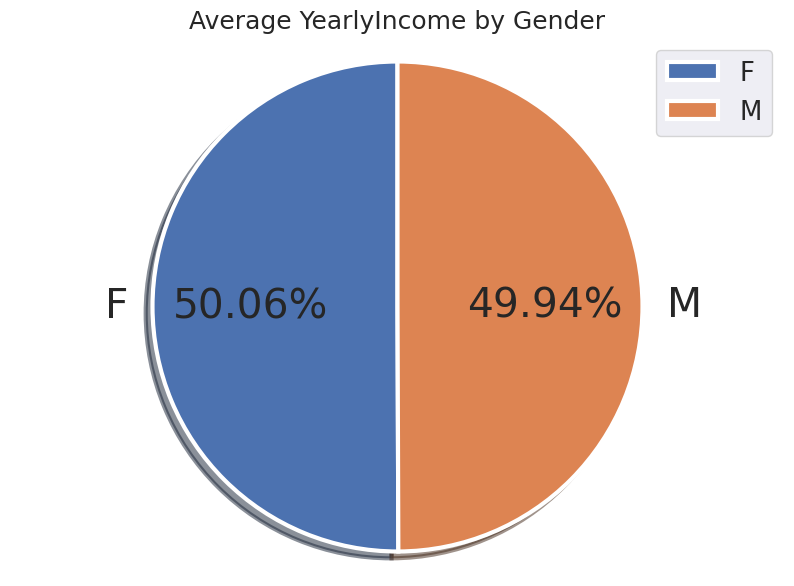

In [66]:
### Group YealyIncome by Gender
py_customer.groupBy('Gender')\
          .agg({'YearlyIncome':'avg'})\
          .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
          .show()


pd_avgIncomebygender = py_customer.groupBy('Gender')\
                                .agg({'YearlyIncome':'avg'})\
                                .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
                                .toPandas()

labels = pd_avgIncomebygender.Gender
AverageYearlyIncome = pd_avgIncomebygender.AverageYearlyIncome

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(10,7))
ax1.pie(AverageYearlyIncome,
        labels=labels,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
ax1.set_title("Average YearlyIncome by Gender", fontsize = 18)
plt.show()



The female customers earn more than the male customers as seen above

+--------------+------+-------------------+
|    Occupation|Gender|AverageYearlyIncome|
+--------------+------+-------------------+
|      Clerical|     F| 30847.222222222223|
|Skilled Manual|     F|  51974.60595446585|
|        Manual|     F| 16142.983230361871|
|    Management|     F|  91739.71679028995|
|  Professional|     F|   73931.2567132116|
|Skilled Manual|     M|  51456.60706498037|
|        Manual|     M| 16730.615507593924|
|    Management|     M|  92870.60301507538|
|      Clerical|     M| 30577.956989247312|
|  Professional|     M|  74444.44444444444|
+--------------+------+-------------------+



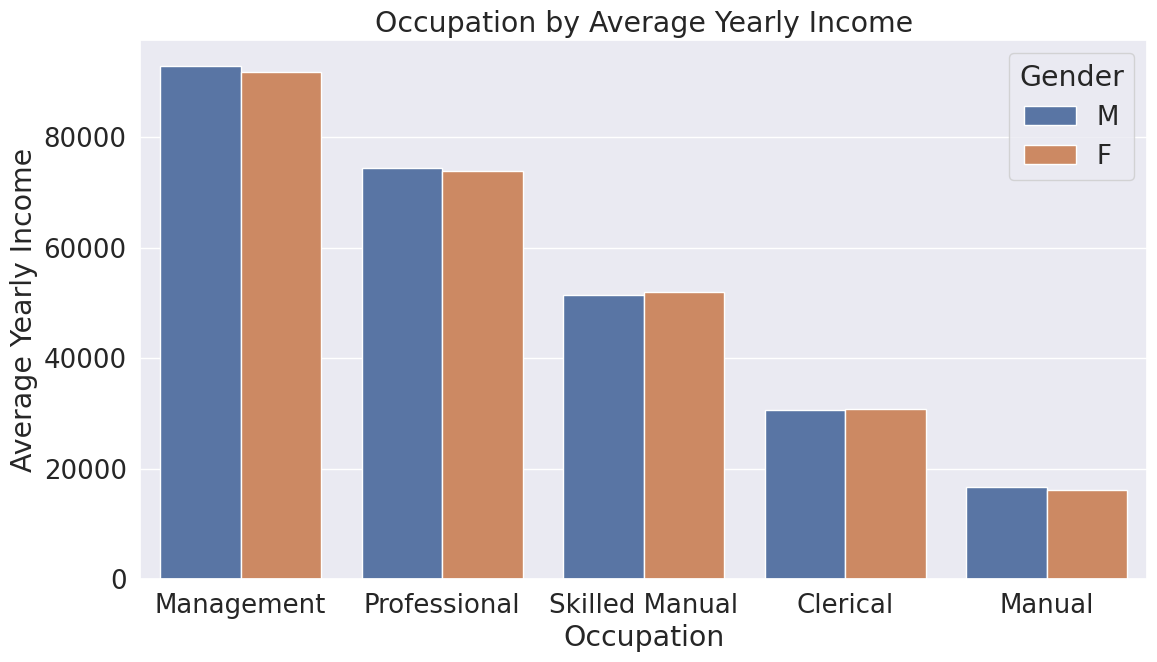

In [67]:
## Group YealyIncome by Occupation
py_customer.groupBy('Occupation','Gender')\
          .agg({'YearlyIncome':'avg'})\
          .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
          .show()

pd_avgIncomebyOccupation = py_customer.groupBy('Occupation','Gender')\
                                      .agg({'YearlyIncome':'avg'})\
                                      .orderBy(f.desc(f.avg(f.col('YearlyIncome'))))\
                                      .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
                                      .toPandas()

## Visualize YearlyIncome by Occupation
### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(13,7))
sns.barplot(x ='Occupation', y = 'AverageYearlyIncome', data = pd_avgIncomebyOccupation,hue = 'Gender')
plt.title('Occupation by Average Yearly Income')
plt.ylabel('Average Yearly Income')
plt.show()

Customers whose occupation is classified as Management are the ones who earn the most on an average. The Male managers slightly earn more than the  female professionsal. this is the same for the customers whose occupation is classified as Professional and Manual. For other occupation, the female gender earn more.

 Next, we will investigate the average income per age group.

### **EDA on Education by Yearly Income**

+-------------------+-------------------+
|          Education|AverageYearlyIncome|
+-------------------+-------------------+
|    Graduate Degree|  66095.95484477893|
|          Bachelors|  64395.07094846901|
|    Partial College|  55211.29541864139|
|        High School|  49049.78749241044|
|Partial High School|  39468.69070208729|
+-------------------+-------------------+



/tmp/ipython-input-68-431625807.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Education', y = 'AverageYearlyIncome', data = pd_avgIncomebyOccupation, palette = "Greens")


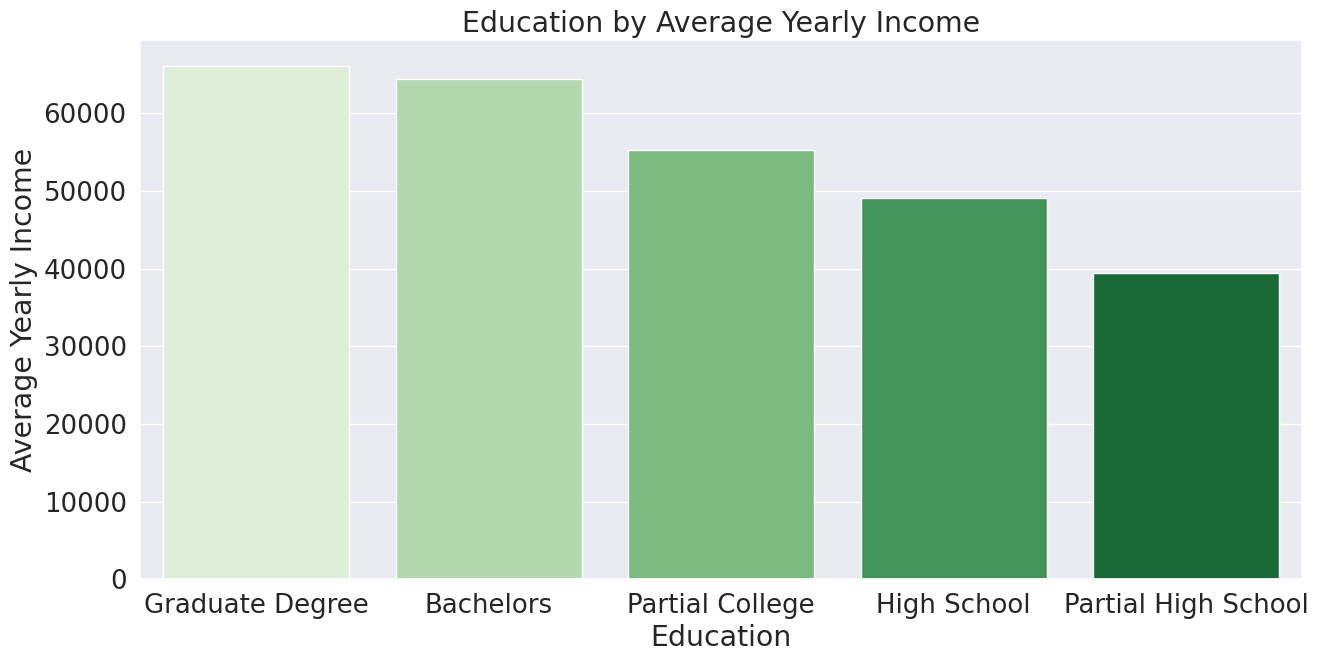

In [68]:
## Group YealyIncome by Education
py_customer.groupBy('Education')\
          .agg({'YearlyIncome':'avg'})\
          .orderBy(f.desc(f.avg(f.col('YearlyIncome'))))\
          .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
          .show()

pd_avgIncomebyOccupation = py_customer.groupBy('Education')\
                                      .agg({'YearlyIncome':'avg'})\
                                      .orderBy(f.desc(f.avg(f.col('YearlyIncome'))))\
                                      .withColumnRenamed('avg(YearlyIncome)','AverageYearlyIncome')\
                                      .toPandas()

## Visualize YearlyIncome by Education
### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(15,7))
sns.barplot(x ='Education', y = 'AverageYearlyIncome', data = pd_avgIncomebyOccupation, palette = "Greens")
plt.title('Education by Average Yearly Income')
plt.ylabel('Average Yearly Income')
plt.show()

Customers who got a Graduate degree and Bachelors earn more than others. Interestigly, those who partially attended college also earn more than those who didn't.

### **EDA on Age by Yearly Income**

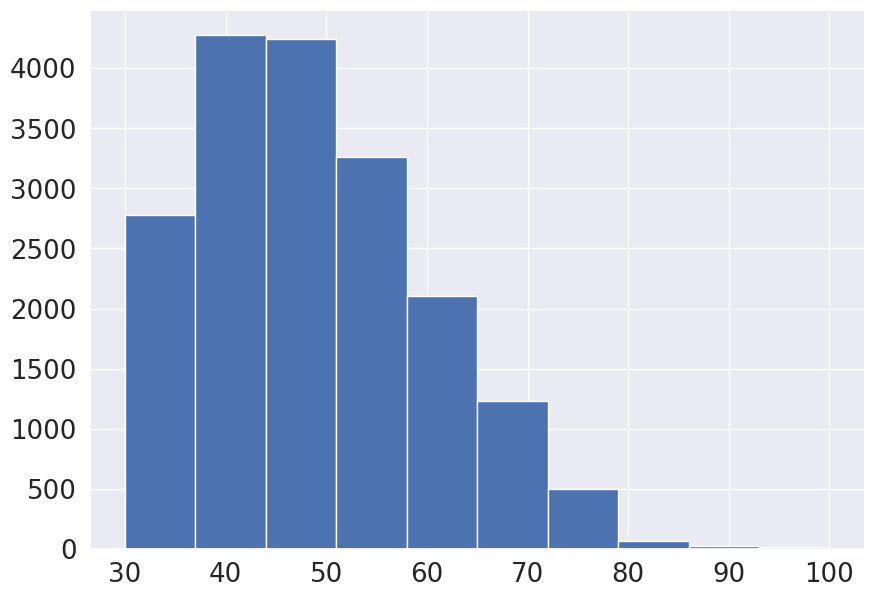

,CustomerKey,YearlyIncome,Age
count,18484.000000,18484.000000,18484.000000
mean,20241.500000,57305.777970,48.420039
std,5336.015523,32285.841703,11.249188
min,11000.000000,10000.000000,30.000000
25%,15620.750000,30000.000000,40.000000
50%,20241.500000,60000.000000,47.000000
75%,24862.250000,70000.000000,56.000000
max,29483.000000,170000.000000,100.000000


In [69]:
### Checking the Age Distribution
### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(10,7))
plt.hist(pd_customer['Age'])
plt.show()

pd_customer.describe()

We see that the Age is between 30 and 100 for the customers.

 Next, we will investigate the average income per age group.

+---------+------------------+
|Age_Range| avg(YearlyIncome)|
+---------+------------------+
|    50-59|  63251.8501906257|
|    60-69| 62674.12935323383|
|    40-49| 59899.84101748808|
|    70-79| 58689.38401048493|
|    30-39|45075.994635672774|
|    80-89| 37538.46153846154|
|   90-100| 17619.04761904762|
+---------+------------------+



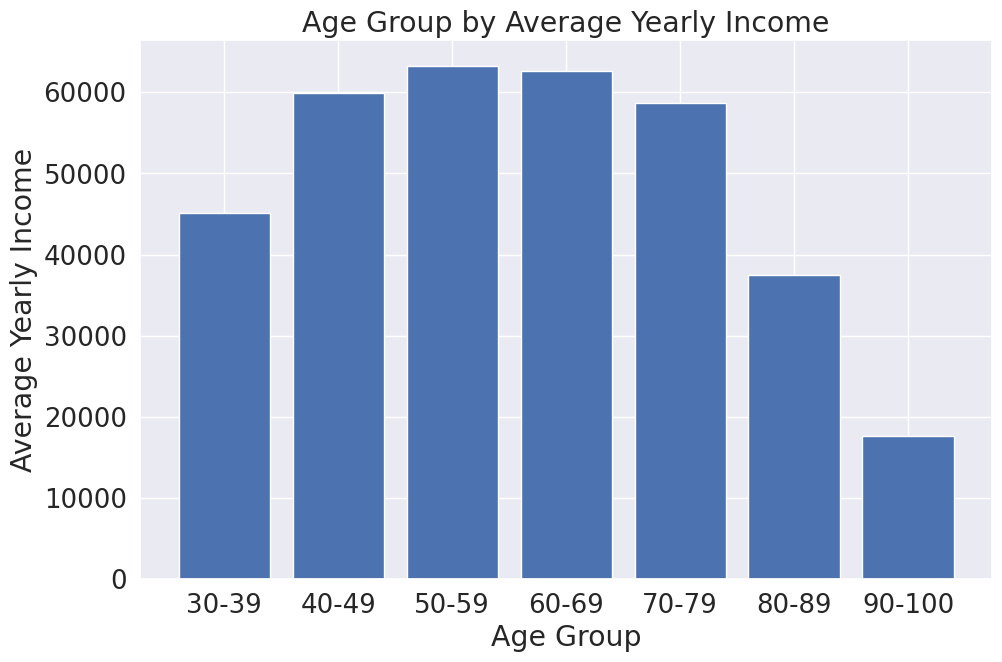

In [70]:
## Group YealyIncome by Age Range
py_customer.groupBy('Age_Range')\
          .avg('YearlyIncome')\
          .orderBy(f.desc(f.avg(f.col('YearlyIncome'))))\
          .show()

### Binnig the Age in Pandas Dataframe
pd_age_30_39 = pd_customer[(pd_customer['Age']>=30) & (pd_customer['Age']<=39)]['YearlyIncome'].mean()
pd_age_40_49 = pd_customer[(pd_customer['Age']>=40) & (pd_customer['Age']<=49)]['YearlyIncome'].mean()
pd_age_50_59 = pd_customer[(pd_customer['Age']>=50) & (pd_customer['Age']<=59)]['YearlyIncome'].mean()
pd_age_60_69 = pd_customer[(pd_customer['Age']>=60) & (pd_customer['Age']<=69)]['YearlyIncome'].mean()
pd_age_70_79 = pd_customer[(pd_customer['Age']>=70) & (pd_customer['Age']<=79)]['YearlyIncome'].mean()
pd_age_80_89 = pd_customer[(pd_customer['Age']>=80) & (pd_customer['Age']<=89)]['YearlyIncome'].mean()
pd_age_90_100 = pd_customer[(pd_customer['Age']>=90) & (pd_customer['Age']<=100)]['YearlyIncome'].mean()

## Visualize YearlyIncome by Age Range
pd_age = [pd_age_30_39,pd_age_40_49, pd_age_50_59, pd_age_60_69,pd_age_70_79,pd_age_80_89,pd_age_90_100]
pd_agegroup = ['30-39','40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(11,7))
plt.bar(pd_agegroup, pd_age)
plt.xlabel('Age Group')
plt.ylabel('Average Yearly Income')
plt.title ('Age Group by Average Yearly Income')
plt.show()

The data shows that the customers who are within the age of 40-69 earn more on an average. Particularly those who are within the age of 50-59

In [71]:
py_factsales.show(15)

+-------------+------------------+---------------+---------+------+-------------------+----------+------------+---+---------+-----------------+--------------+----------------+-----------+------+------+-------+--------------+
|OrderQuantity|ProductSubcategory|ProductCategory| Currency|Gender|          Education|Occupation|YearlyIncome|Age|Age_Range|YearlyIncomeLevel|       Country|TotalProductCost|SalesAmount|Profit|TaxAmt|Freight|DiscountAmount|
+-------------+------------------+---------------+---------+------+-------------------+----------+------------+---+---------+-----------------+--------------+----------------+-----------+------+------+-------+--------------+
|            1|        Bike Racks|    Accessories|US Dollar|     F|Partial High School|    Manual|       10000| 45|    40-49|       Low Income|       Germany|           44.88|      120.0| 75.12|   9.6|    3.0|           0.0|
|            1|        Bike Racks|    Accessories|US Dollar|     M|Partial High School|    Manual|  

##**EXPLORATORY DATA ANALYSIS on FACT Sales**

### **Converting the pyspark dataframe to pandas**

In [72]:
### CONVERT PYSPARK TO PANDAS DATAFRAME
pd_factsales = py_factsales.toPandas()
pd_factsales.head(10)

,OrderQuantity,ProductSubcategory,ProductCategory,Currency,Gender,Education,Occupation,YearlyIncome,Age,Age_Range,YearlyIncomeLevel,Country,TotalProductCost,SalesAmount,Profit,TaxAmt,Freight,DiscountAmount
0,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,45,40-49,Low Income,Germany,44.88,120.00,75.12,9.60,3.00,0.0
1,1,Bike Racks,Accessories,US Dollar,M,Partial High School,Manual,10000,35,30-39,Low Income,France,44.88,120.00,75.12,9.60,3.00,0.0
2,1,Bike Racks,Accessories,US Dollar,M,High School,Manual,10000,40,40-49,Low Income,United Kingdom,54.22,144.96,90.74,11.60,3.62,0.0
3,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,36,30-39,Low Income,United Kingdom,54.22,144.96,90.74,11.60,3.62,0.0
4,1,Bike Racks,Accessories,US Dollar,F,Graduate Degree,Manual,10000,48,40-49,Low Income,Germany,44.88,120.00,75.12,9.60,3.00,0.0
5,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,100,90-100,Low Income,Germany,44.88,120.00,75.12,9.60,3.00,0.0
6,1,Bike Racks,Accessories,US Dollar,M,Partial High School,Clerical,10000,62,60-69,Low Income,Australia,30.61,81.84,51.23,6.55,2.05,0.0
7,1,Bike Racks,Accessories,US Dollar,F,Partial College,Manual,10000,55,50-59,Low Income,France,44.88,120.00,75.12,9.60,3.00,0.0
8,1,Bike Stands,Accessories,US Dollar,F,Partial High School,Manual,10000,36,30-39,Low Income,United Kingdom,71.83,192.07,120.24,15.37,4.80,0.0
9,1,Bike Stands,Accessories,US Dollar,M,Partial High School,Manual,10000,37,30-39,Low Income,France,59.47,159.00,99.53,12.72,3.98,0.0


In [73]:
### CHECK FOR NULL VALUES
pd_factsales.isnull().sum()

,0
OrderQuantity,0
ProductSubcategory,0
ProductCategory,0
Currency,0
Gender,0
Education,0
Occupation,0
YearlyIncome,0
Age,0
Age_Range,0


In [74]:
### Print Summary
pd_factsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60391 entries, 0 to 60390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderQuantity       60391 non-null  int32  
 1   ProductSubcategory  60391 non-null  object 
 2   ProductCategory     60391 non-null  object 
 3   Currency            60391 non-null  object 
 4   Gender              60391 non-null  object 
 5   Education           60391 non-null  object 
 6   Occupation          60391 non-null  object 
 7   YearlyIncome        60391 non-null  int32  
 8   Age                 60391 non-null  int32  
 9   Age_Range           60391 non-null  object 
 10  YearlyIncomeLevel   60391 non-null  object 
 11  Country             60391 non-null  object 
 12  TotalProductCost    60391 non-null  float64
 13  SalesAmount         60391 non-null  float64
 14  Profit              60391 non-null  float64
 15  TaxAmt              60391 non-null  float64
 16  Frei

### **Performing SQL Queries**

To perform SQL queries, we need to first create a temporary view. This will enable the view be usuable within the session that creates it.  

In [75]:
### create a temp view
py_factsales.createOrReplaceTempView('py_factsales')


### **EDA on Total Profit by Gender**

+------+------------------+
|Gender|            Profit|
+------+------------------+
|     F|5484816.6399999205|
|     M| 5410002.209999938|
+------+------------------+



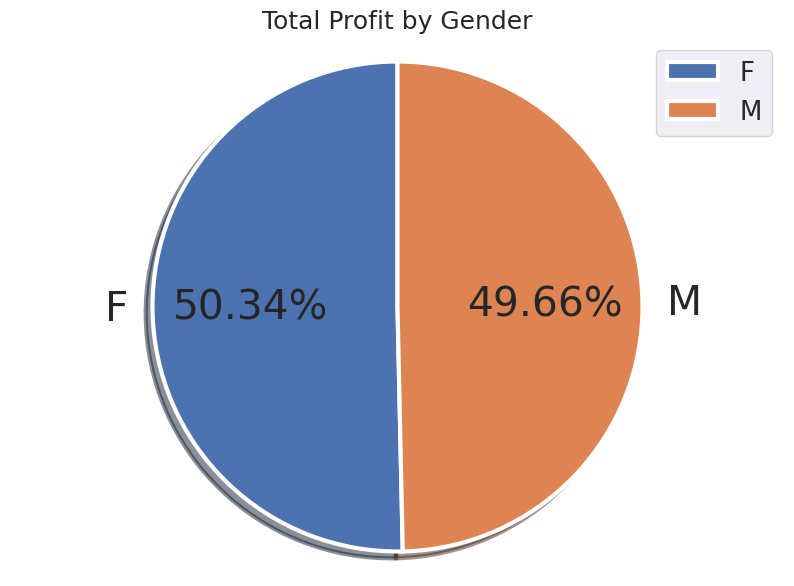

In [76]:
### Plot Profit by Gender
py_factsales.groupBy('Gender').agg({'Profit':'sum'}).withColumnRenamed('sum(Profit)','Profit').show()

### Pie chart

### Data
pd_profitbygender = py_factsales.groupBy('Gender')\
                                .agg({'Profit':'sum'})\
                                .withColumnRenamed('sum(Profit)','TotalProfit')\
                                .toPandas()

labels = pd_profitbygender.Gender
Profit = pd_profitbygender.TotalProfit

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(10,7))
ax1.pie(Profit,
        labels=labels,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
ax1.set_title("Total Profit by Gender", fontsize = 18)
plt.show()

The sum of profit for women (USD 5,484,816.64 (**50.3%**)) was slightly higher than men (USD 5,410,002.21 (**49.7%**)) of the total profits earned by the company over the years


### **EDA on Total Profit by Product Category**

+---------------+--------------------+
|ProductCategory|         sum(Profit)|
+---------------+--------------------+
|          Bikes|1.0364208010000058E7|
|       Clothing|  124738.36999999874|
|    Accessories|  405872.46999998123|
+---------------+--------------------+



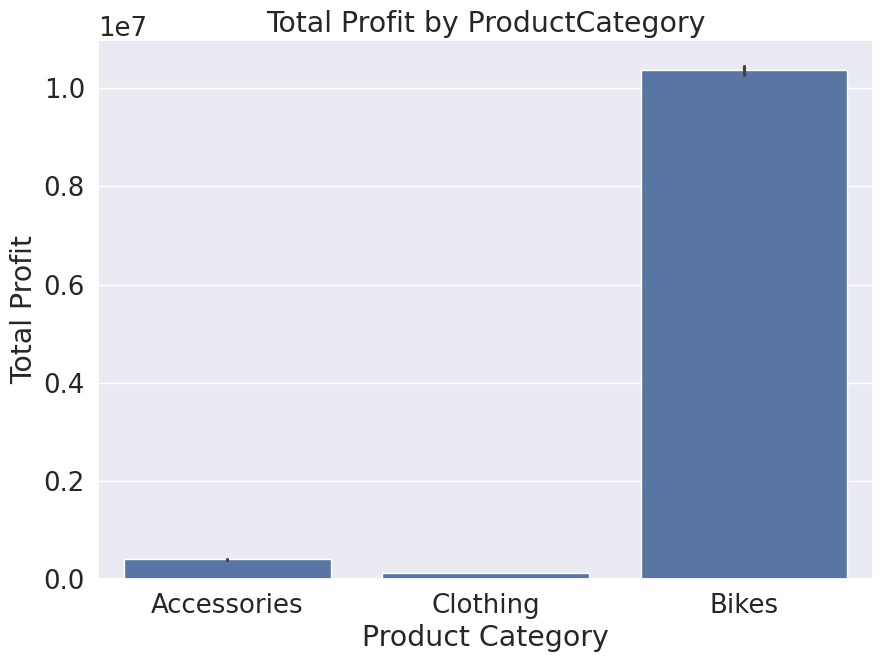

In [77]:
### Group Profit by Product Category
py_factsales.groupBy('ProductCategory').agg({'Profit':'sum'}).show()

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(10,7))
sns.barplot(y = 'Profit', x ='ProductCategory', data = pd_factsales, estimator = sum)
plt.title('Total Profit by ProductCategory')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()


Bikes had the highest Sum of Profit at USD 10,364,208.01, followed by Accessories at USD 405,872.47 and Clothing at USD 124,738.37. Bikes accounted for 95.13% of Sum of Profit.

 Next we will investigate the exact bike priduct that brings in the most profit

### **EDA on Total Profit by Product Subcategory**

+------------------+------------------+
|ProductSubcategory|      Total Profit|
+------------------+------------------+
|        Road Bikes| 4895013.309999975|
|    Mountain Bikes|4119628.8100000536|
|     Touring Bikes|1349565.8900000043|
|   Tires and Tubes|142036.87999999846|
|           Helmets|131639.14000000543|
+------------------+------------------+
only showing top 5 rows



/tmp/ipython-input-78-2507394073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Profit', y='ProductSubcategory', data=pd_profitbysubcat, palette="Reds")


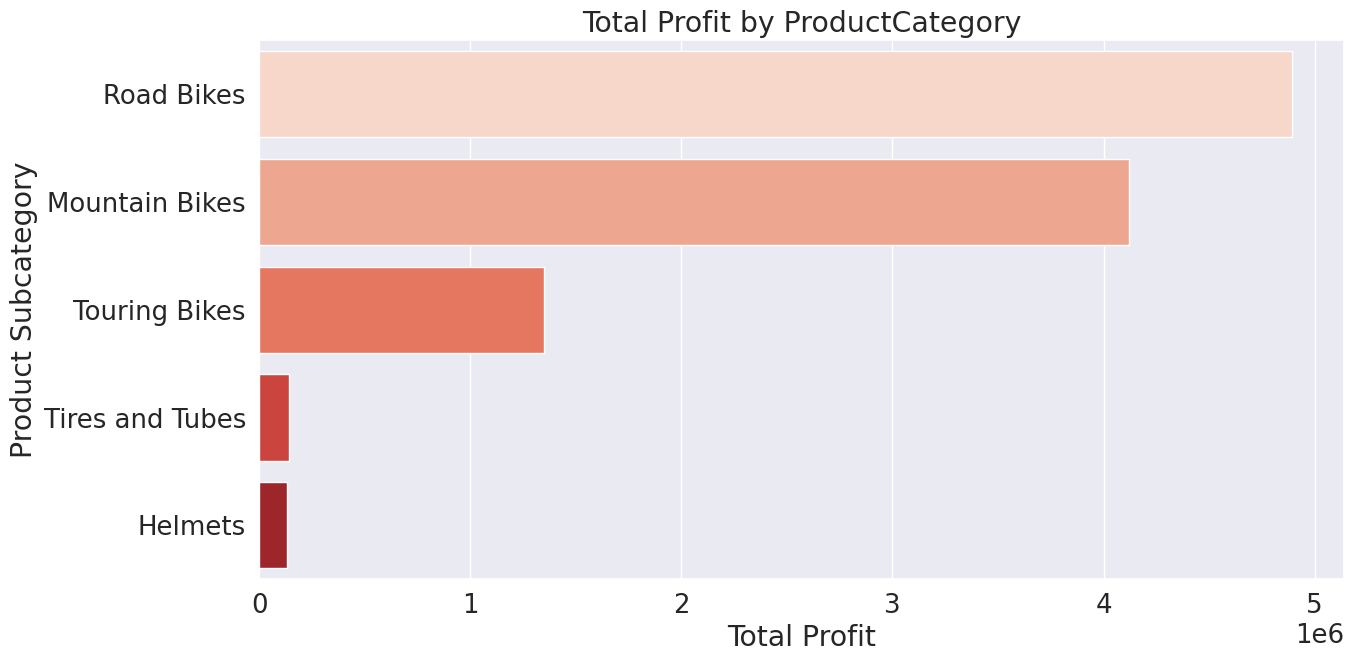

In [78]:
py_factsales.groupBy('ProductSubcategory')\
            .agg({'Profit':'sum'})\
            .orderBy(f.desc(f.sum(f.col('Profit'))))\
            .withColumnRenamed('sum(Profit)','Total Profit')\
            .show(5) #show top 5

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(14,7))
pd_profitbysubcat = py_factsales.groupBy('ProductSubcategory')\
                                .agg({'Profit':'sum'})\
                                .orderBy(f.desc(f.sum(f.col('Profit'))))\
                                .withColumnRenamed('sum(Profit)','Total Profit')\
                                .limit(5)\
                                .toPandas()

sns.barplot(x='Total Profit', y='ProductSubcategory', data=pd_profitbysubcat, palette="Reds")
plt.title('Total Profit by ProductCategory')
plt.ylabel('Product Subcategory')
plt.xlabel('Total Profit')
plt.show()


Road Bikes had the highest Sum of Profit and accounted for 44.93% (USD 4,895,013.31) of the Total Profit.

### **EDA on Total Profit by Country**

+--------------+------------------+
|       Country|      Total Profit|
+--------------+------------------+
| United States| 3900863.899999991|
|     Australia| 2515307.959999916|
|United Kingdom|1679171.8400000217|
|       Germany|1143206.8700000118|
|        France|1025708.7600000083|
|        Canada| 630559.5199999926|
+--------------+------------------+



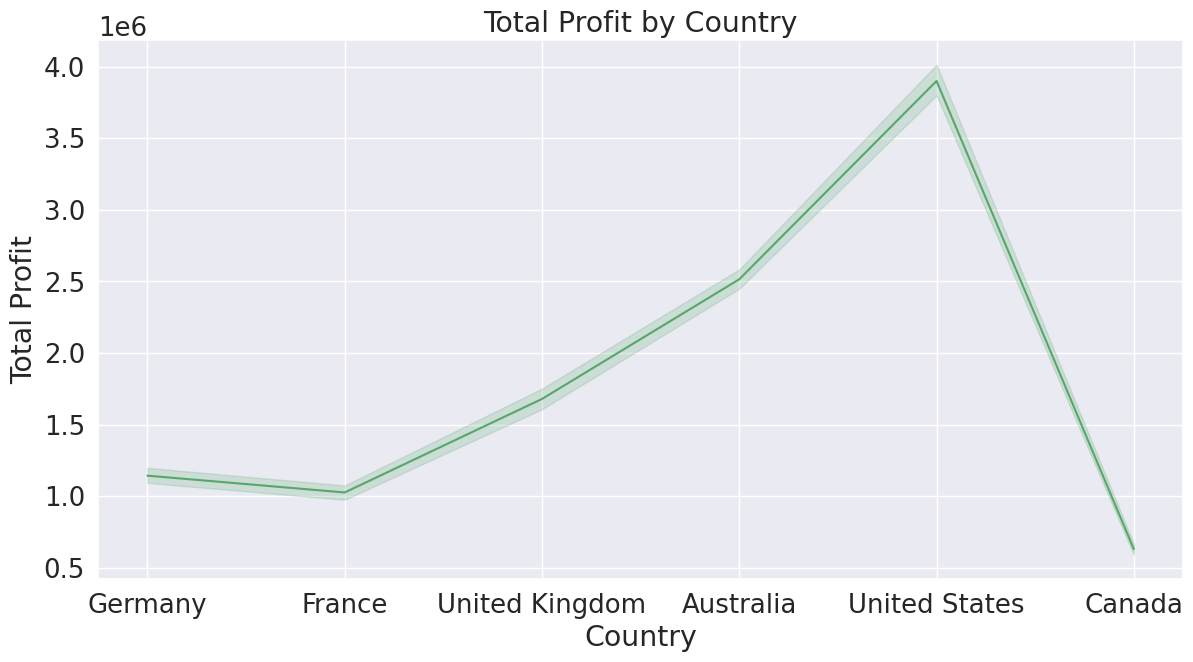

In [79]:
### Plot Profit by Country
py_factsales.groupBy('Country')\
            .agg({'Profit':'sum'})\
            .orderBy(f.desc(f.sum(f.col('Profit'))))\
            .withColumnRenamed('sum(Profit)','Total Profit')\
            .show()

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(14,7))
sns.lineplot(x = 'Country', y = 'Profit', data = pd_factsales, color = 'g', estimator = sum)
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.show()

At USD 3,900,863.90, United States had the highest Sum of Profit and was 518.64% higher than Canada, which had the lowest Sum of Profit at USD 630,559.52. United States accounted for 35.80% of Sum of Profit.

Across all 6 Country, Sum of Profit ranged from USD 630,559.52 to USD 3,900,863.90.


### **EDA on Total Profit by Age Range**

+---------+------------------+
|Age_Range|      Total Profit|
+---------+------------------+
|    40-49|4223623.1199999135|
|    50-59|2919435.5300000124|
|    30-39|2271649.4800000256|
|    60-69| 1193298.320000012|
|    70-79|274164.95999999903|
|    80-89|11770.880000000001|
|   90-100|            876.56|
+---------+------------------+



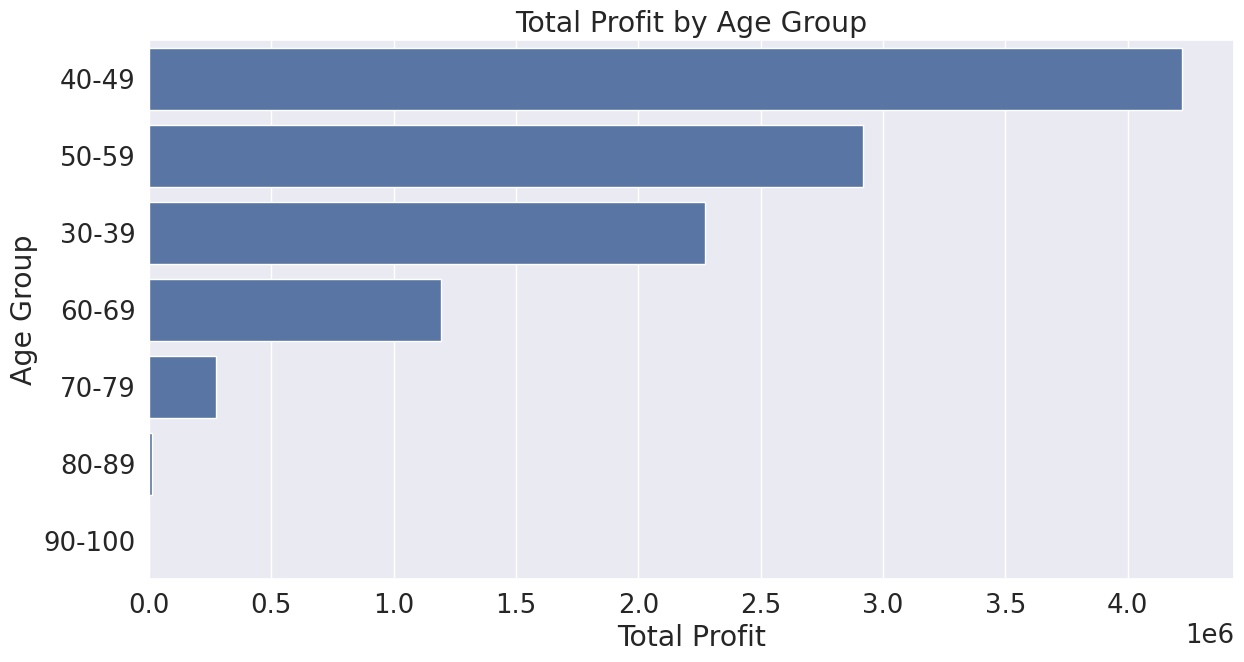

In [80]:
### Plot Profit by Age Range
py_factsales.groupBy('Age_Range')\
            .agg({'Profit':'sum'})\
            .orderBy(f.desc(f.sum(f.col('Profit'))))\
            .withColumnRenamed('sum(Profit)','Total Profit').show()


pd_profitbyage = py_factsales.groupBy('Age_Range')\
                                .agg({'Profit':'sum'})\
                                .orderBy(f.desc(f.sum(f.col('Profit'))))\
                                .withColumnRenamed('sum(Profit)','Total Profit')\
                                .toPandas()

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(14,7))
sns.barplot(x='Total Profit', y='Age_Range', data=pd_profitbyage)
plt.title('Total Profit by Age Group')
plt.xlabel('Total Profit')
plt.ylabel('Age Group')
plt.show()

Customers who are within the age range of  40-49 accounted for 38.77% (USD 4,223,623.12) of the profit across the years.

### **EDA on Total Profit by Customer's Occupation**

+--------------+------------------+
|    Occupation|      Total Profit|
+--------------+------------------+
|  Professional|3583399.8299999465|
|Skilled Manual|2381372.4700000333|
|    Management| 1963529.780000032|
|      Clerical|1857263.7000000267|
|        Manual|1109253.0700000138|
+--------------+------------------+



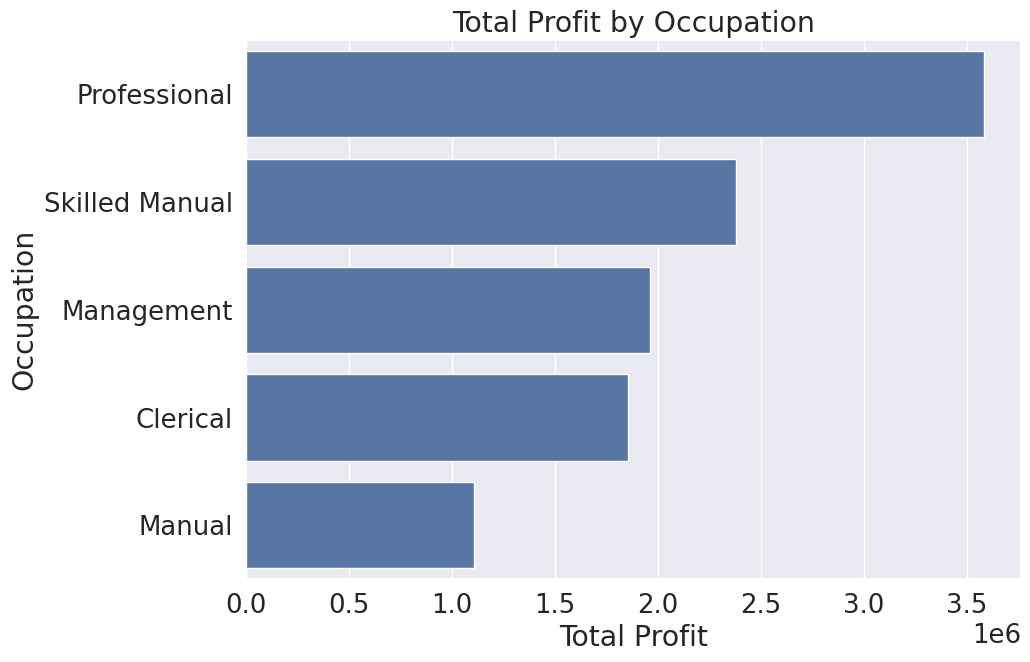

In [81]:
### Plot Profit by Age Range
py_factsales.groupBy('Occupation')\
            .agg({'Profit':'sum'})\
            .orderBy(f.desc(f.sum(f.col('Profit'))))\
            .withColumnRenamed('sum(Profit)','Total Profit').show()


pd_profitbyoccupation = py_factsales.groupBy('Occupation')\
                                    .agg({'Profit':'sum'})\
                                    .orderBy(f.desc(f.sum(f.col('Profit'))))\
                                    .withColumnRenamed('sum(Profit)','Total Profit')\
                                    .toPandas()

### Plot
sns.set(font_scale=1.7)
fig1, ax1 = plt.subplots(figsize =(10,7))
sns.barplot(y='Occupation', x='Total Profit', data=pd_profitbyoccupation, estimator = sum)
plt.title('Total Profit by Occupation')
plt.ylabel('Occupation')
plt.xlabel('Total Profit')
plt.show()

At USD 3,583,399.83, Customers who are professionals by occupation brought the highest Profit and was 223.05% higher than customers with manual occupation, which had the lowest Sum of Profit at USD 1,109,253.07. Professional Occupation accounted for 32.89% of Sum of Profit.

##**CLASSIFICATION**

### **Classification Data**

In [82]:
## Data
pd_classification = pd_factsales
pd_classification.head(5)

,OrderQuantity,ProductSubcategory,ProductCategory,Currency,Gender,Education,Occupation,YearlyIncome,Age,Age_Range,YearlyIncomeLevel,Country,TotalProductCost,SalesAmount,Profit,TaxAmt,Freight,DiscountAmount
0,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,45,40-49,Low Income,Germany,44.88,120.00,75.12,9.6,3.00,0.0
1,1,Bike Racks,Accessories,US Dollar,M,Partial High School,Manual,10000,35,30-39,Low Income,France,44.88,120.00,75.12,9.6,3.00,0.0
2,1,Bike Racks,Accessories,US Dollar,M,High School,Manual,10000,40,40-49,Low Income,United Kingdom,54.22,144.96,90.74,11.6,3.62,0.0
3,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,36,30-39,Low Income,United Kingdom,54.22,144.96,90.74,11.6,3.62,0.0
4,1,Bike Racks,Accessories,US Dollar,F,Graduate Degree,Manual,10000,48,40-49,Low Income,Germany,44.88,120.00,75.12,9.6,3.00,0.0


### **EDA on YearlyIncomeLevel**

<Axes: xlabel='ProductCategory', ylabel='count'>

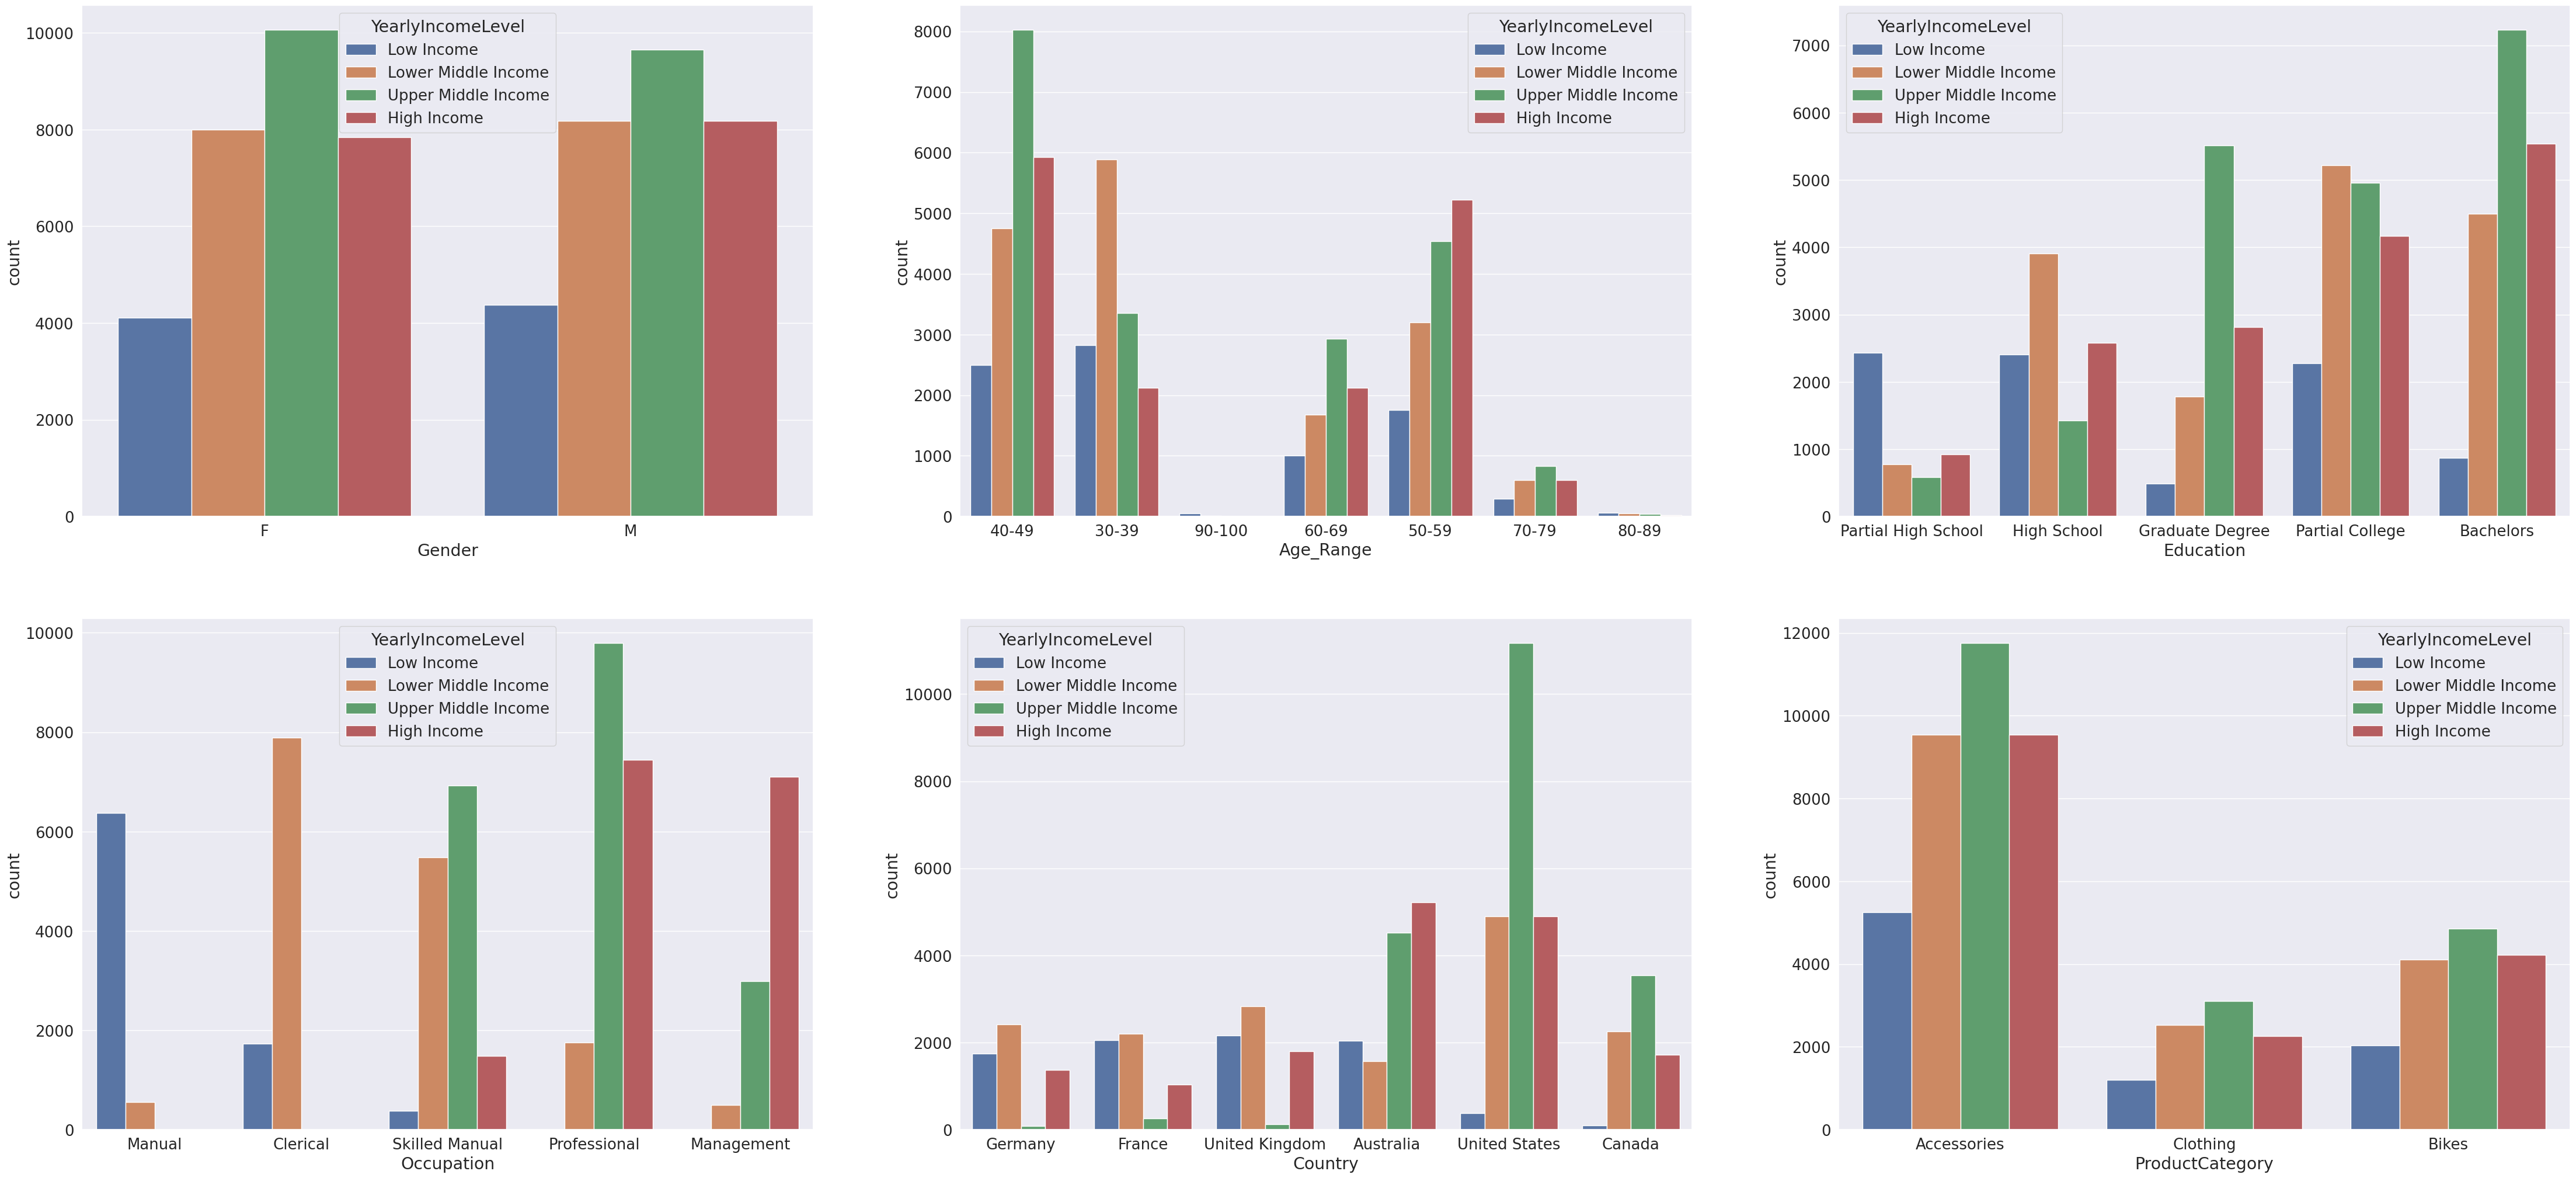

In [83]:
sns.set(font_scale=1.7)
fig, axarr = plt.subplots(2, 3, figsize=(55, 25))
sns.countplot(x="Gender", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[0][0])
sns.countplot(x="Age_Range", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[0][1])
sns.countplot(x="Education", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[0][2])
sns.countplot(x="Occupation", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[1][0])
sns.countplot(x="Country", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[1][1])
sns.countplot(x="ProductCategory", hue = "YearlyIncomeLevel", data = pd_classification, ax=axarr[1][2])


Across all datapoints, customers who are in the Upper Middle income level are more than others

### **Heatmap Correlation**

ValueError: could not convert string to float: 'Bike Racks'

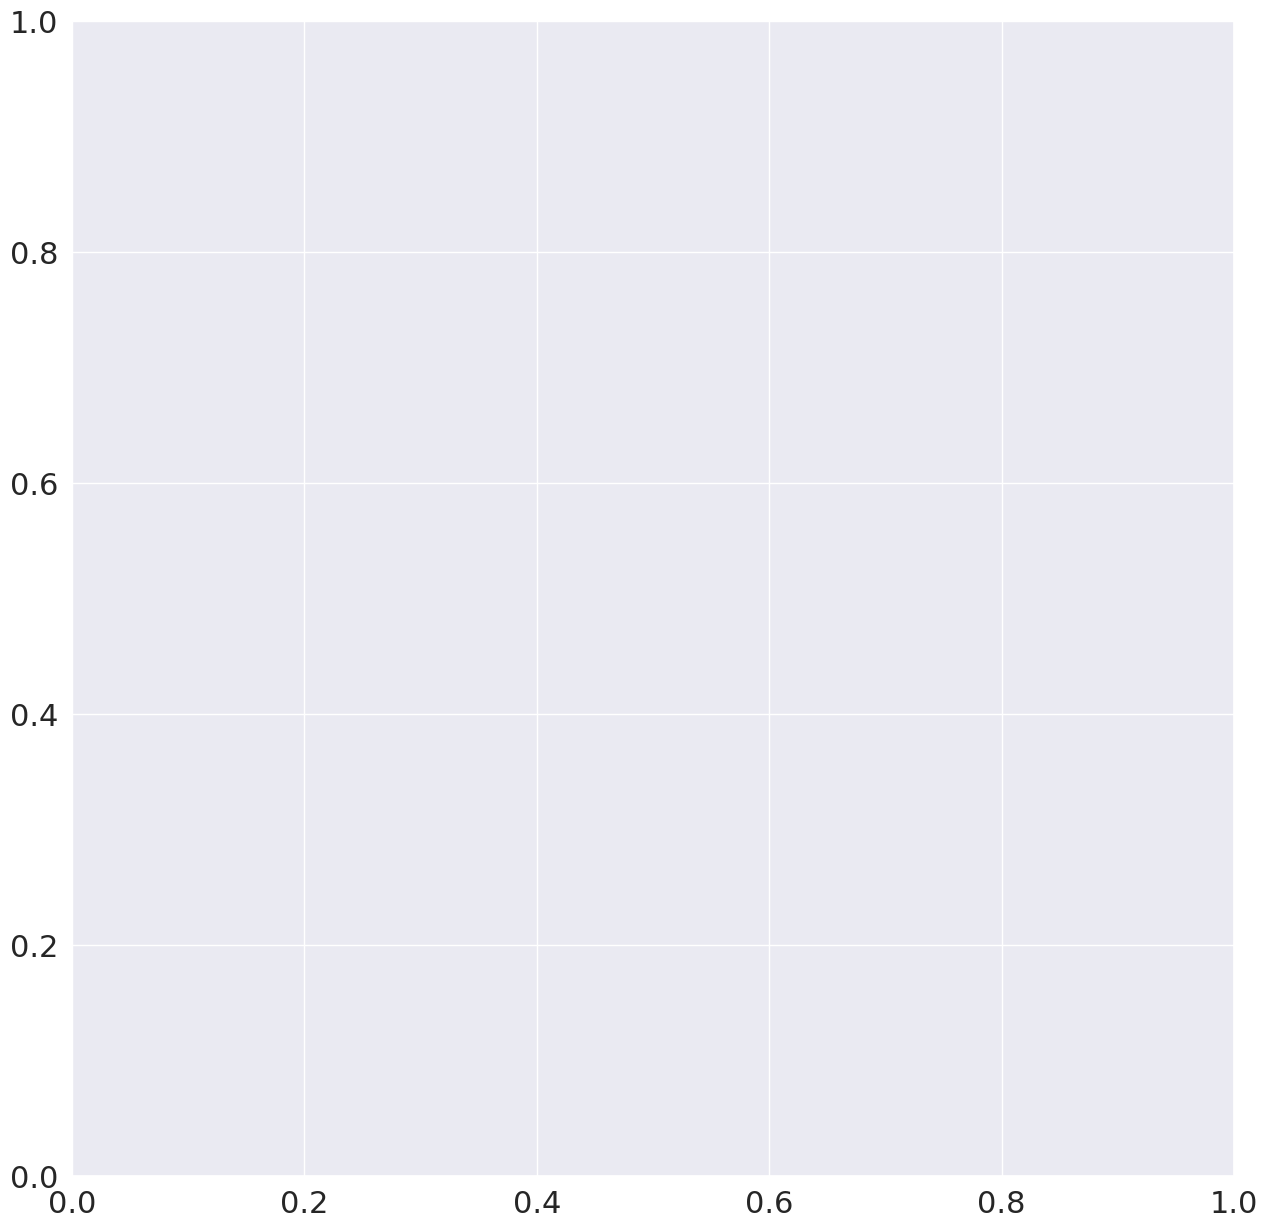

In [85]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1, figsize=(15,15))
sns.heatmap(pd_classification.corr(), annot=True, fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

The features with strone correlation are:TotalProductCost,Sales Amount, Profit, TaxAmt and Freight   



### **Transforming Categorical Features**

In [86]:
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["Gender"], prefix="Gender")], axis=1)
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["Education"], prefix="Education")], axis=1)
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["Occupation"], prefix="Occupation")], axis=1)
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["Country"], prefix="Country")], axis=1)
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["ProductCategory"], prefix="ProductCategory")], axis=1)
pd_classification = pd.concat([pd_classification, pd.get_dummies(pd_classification["ProductSubcategory"], prefix="ProductSubcategory")], axis=1)
pd_classification["YearlyIncomeLevel"] = pd_classification["YearlyIncomeLevel"].apply(lambda x: ["Low Income", "Lower Middle Income","Upper Middle Income", "High Income"].index(x))+1 #target variable for the ML model (label encoding)


pd_classification.head(5)

,OrderQuantity,ProductSubcategory,ProductCategory,Currency,Gender,Education,Occupation,YearlyIncome,Age,Age_Range,...,ProductSubcategory_Helmets,ProductSubcategory_Hydration Packs,ProductSubcategory_Jerseys,ProductSubcategory_Mountain Bikes,ProductSubcategory_Road Bikes,ProductSubcategory_Shorts,ProductSubcategory_Socks,ProductSubcategory_Tires and Tubes,ProductSubcategory_Touring Bikes,ProductSubcategory_Vests
0,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,45,40-49,...,False,False,False,False,False,False,False,False,False,False
1,1,Bike Racks,Accessories,US Dollar,M,Partial High School,Manual,10000,35,30-39,...,False,False,False,False,False,False,False,False,False,False
2,1,Bike Racks,Accessories,US Dollar,M,High School,Manual,10000,40,40-49,...,False,False,False,False,False,False,False,False,False,False
3,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,36,30-39,...,False,False,False,False,False,False,False,False,False,False
4,1,Bike Racks,Accessories,US Dollar,F,Graduate Degree,Manual,10000,48,40-49,...,False,False,False,False,False,False,False,False,False,False


### **Feature Selection**

In [87]:
#Deleting original categorical columns
pd_classification.drop(["Gender", "Education", "Occupation", "Country", "ProductCategory", "ProductSubcategory", "Age_Range","Currency"], axis=1, inplace=True)
pd_classification.head(5)

,OrderQuantity,YearlyIncome,Age,YearlyIncomeLevel,TotalProductCost,SalesAmount,Profit,TaxAmt,Freight,DiscountAmount,...,ProductSubcategory_Helmets,ProductSubcategory_Hydration Packs,ProductSubcategory_Jerseys,ProductSubcategory_Mountain Bikes,ProductSubcategory_Road Bikes,ProductSubcategory_Shorts,ProductSubcategory_Socks,ProductSubcategory_Tires and Tubes,ProductSubcategory_Touring Bikes,ProductSubcategory_Vests
0,1,10000,45,1,44.88,120.00,75.12,9.6,3.00,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,10000,35,1,44.88,120.00,75.12,9.6,3.00,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1,10000,40,1,54.22,144.96,90.74,11.6,3.62,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1,10000,36,1,54.22,144.96,90.74,11.6,3.62,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1,10000,48,1,44.88,120.00,75.12,9.6,3.00,0.0,...,False,False,False,False,False,False,False,False,False,False


### **Data Modelling**

In [88]:
### Defining X and Y

x = pd_classification.drop('YearlyIncomeLevel',axis=1)
y = pd_classification['YearlyIncomeLevel']

In [89]:
### Setting Train and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

### **Logistic Regression**

Logistic regression was used for the classification. The feature used for classification is the YearlyIncomeLevel. Logistic regression training is very efficient, simpler to use and interpret. It does not make any assumption regarding the distribution of classes in feature space. It is only effective when predicting discrete functions.

In [90]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
log_predict = logmodel.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,log_predict))
print(confusion_matrix(y_test,log_predict))

              precision    recall  f1-score   support

           1       0.78      0.35      0.49      2612
           2       0.60      0.64      0.62      4853
           3       0.65      0.75      0.70      5904
           4       0.78      0.81      0.80      4749

    accuracy                           0.68     18118
   macro avg       0.70      0.64      0.65     18118
weighted avg       0.69      0.68      0.67     18118

[[ 921 1691    0    0]
 [ 254 3127 1472    0]
 [   1  399 4404 1100]
 [   0    0  879 3870]]


Interpreting the F1 score, the model did a poor job predicting the customers who are of the Low-income level. However, increasingly did well in classifying others. It accurately predicted 80% of the customers as High-income earners.

##**Price Prediction**

In [92]:
pd_prediction = pd_factsales
pd_prediction.head(5)

,OrderQuantity,ProductSubcategory,ProductCategory,Currency,Gender,Education,Occupation,YearlyIncome,Age,Age_Range,YearlyIncomeLevel,Country,TotalProductCost,SalesAmount,Profit,TaxAmt,Freight,DiscountAmount
0,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,45,40-49,Low Income,Germany,44.88,120.00,75.12,9.6,3.00,0.0
1,1,Bike Racks,Accessories,US Dollar,M,Partial High School,Manual,10000,35,30-39,Low Income,France,44.88,120.00,75.12,9.6,3.00,0.0
2,1,Bike Racks,Accessories,US Dollar,M,High School,Manual,10000,40,40-49,Low Income,United Kingdom,54.22,144.96,90.74,11.6,3.62,0.0
3,1,Bike Racks,Accessories,US Dollar,F,Partial High School,Manual,10000,36,30-39,Low Income,United Kingdom,54.22,144.96,90.74,11.6,3.62,0.0
4,1,Bike Racks,Accessories,US Dollar,F,Graduate Degree,Manual,10000,48,40-49,Low Income,Germany,44.88,120.00,75.12,9.6,3.00,0.0


In [93]:
### Print Summary
pd_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60391 entries, 0 to 60390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderQuantity       60391 non-null  int32  
 1   ProductSubcategory  60391 non-null  object 
 2   ProductCategory     60391 non-null  object 
 3   Currency            60391 non-null  object 
 4   Gender              60391 non-null  object 
 5   Education           60391 non-null  object 
 6   Occupation          60391 non-null  object 
 7   YearlyIncome        60391 non-null  int32  
 8   Age                 60391 non-null  int32  
 9   Age_Range           60391 non-null  object 
 10  YearlyIncomeLevel   60391 non-null  object 
 11  Country             60391 non-null  object 
 12  TotalProductCost    60391 non-null  float64
 13  SalesAmount         60391 non-null  float64
 14  Profit              60391 non-null  float64
 15  TaxAmt              60391 non-null  float64
 16  Frei

In [94]:
### Defining X and Y

y = pd_classification['Profit']
x = pd_classification[['TotalProductCost','SalesAmount','TaxAmt','Freight','DiscountAmount']]

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [96]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [97]:
# print the intercept
print(lm.intercept_)

0.0003092088551852612


In [98]:
coe = pd.DataFrame(lm.coef_,x.columns,columns = ['Coeffecient'])
coe

,Coeffecient
TotalProductCost,-1.000004
SalesAmount,0.999243
TaxAmt,0.013720
Freight,-0.013563
DiscountAmount,0.000000


The profit of the company was predicted using linear regression. The cost and Freight predictors indicate that an increase in them will reduce the profit by USD 1 and USD 0.014 while an increase in sales and tax amount increases profit by USD 0.99 and  USD 0.014 respectively

In [99]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.00000392  0.9992434   0.01372029 -0.01356278  0.        ]


In [100]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

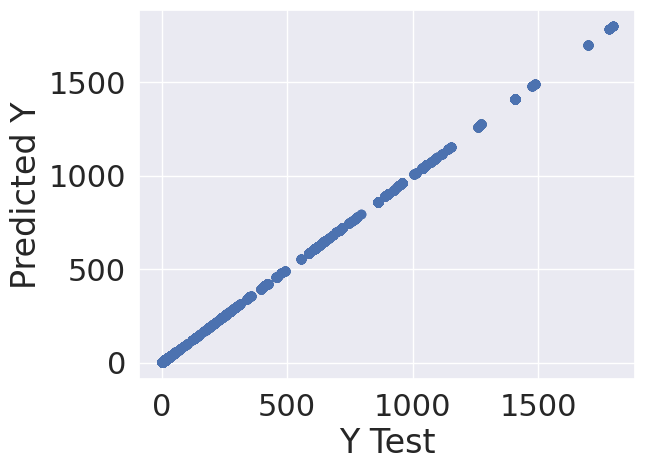

In [101]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [102]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0013915652426094056
MSE: 1.0936016278796633e-05
RMSE: 0.003306964813661711
